# 0.0. Imports

In [794]:
import pandas as pd
import sweetviz as sv
import seaborn as sns
import numpy as np
import pickle

from matplotlib import pyplot as plt

from sklearn import preprocessing as pp
from sklearn import model_selection as ms

import xgboost as xgb
from sklearn import ensemble as en

from sklearn.metrics import f1_score

## 0.1. Loading Data

In [1328]:
data_raw = pd.read_csv( '/Users/thiago/Thiago/Data_Science/myrepos/hack03/cdshackdays3/train.csv')

## 0.2. Helper Functions

In [1329]:
sns.set(rc={'figure.figsize':(17,10)}) # Aumenta o tamanho dos plots no seaborn

# 1.0. PASSO 01 - DESCRICAO DOS DADOS

In [1330]:
df1 = data_raw

In [1331]:
df1.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


## 1.2. Data Dimensions

In [1332]:
print( 'Number of rows:{}'.format( df1.shape[0]))
print( 'Number of columns:{}'.format( df1.shape[1]))

Number of rows:9500
Number of columns:17


## 1.3. Data Types

In [1333]:
df1.dtypes

id_cliente                   int64
idade                        int64
saldo_atual                float64
divida_atual               float64
renda_anual                float64
valor_em_investimentos     float64
taxa_utilizacao_credito    float64
num_emprestimos              int64
num_contas_bancarias         int64
num_cartoes_credito          int64
dias_atraso_dt_venc          int64
num_pgtos_atrasados          int64
num_consultas_credito        int64
taxa_juros                   int64
investe_exterior            object
pessoa_polit_exp            object
limite_adicional            object
dtype: object

## 1.4. Check NA

In [1334]:
df1.isna().sum()

id_cliente                 0
idade                      0
saldo_atual                0
divida_atual               0
renda_anual                0
valor_em_investimentos     0
taxa_utilizacao_credito    0
num_emprestimos            0
num_contas_bancarias       0
num_cartoes_credito        0
dias_atraso_dt_venc        0
num_pgtos_atrasados        0
num_consultas_credito      0
taxa_juros                 0
investe_exterior           0
pessoa_polit_exp           0
limite_adicional           0
dtype: int64

## 1.5. Descriptive Statistical

In [1335]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] )

### 1.5.2. Numerical Atributes

In [1336]:
# Central Tendency - Mean, Meadian
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id_cliente,1.000000,1.250000e+04,1.249900e+04,6210.532947,6172.500000,3.603054e+03,0.014114,-1.199109
1,idade,18.000000,8.598000e+03,8.580000e+03,126.398421,38.000000,6.849999e+02,9.092579,87.613308
2,saldo_atual,0.088628,1.602041e+03,1.601952e+03,404.532032,337.169588,2.176853e+02,1.621743,3.104578
3,divida_atual,0.230000,4.998070e+03,4.997840e+03,1437.086420,1175.730000,1.156202e+03,1.187913,0.848447
4,renda_anual,10473.865350,2.327966e+07,2.326918e+07,195037.274234,45991.106000,1.454197e+06,11.874057,149.389202
5,valor_em_investimentos,0.000000,1.000000e+04,1.000000e+04,611.999323,134.201478,2.002338e+03,4.436327,17.868001
6,taxa_utilizacao_credito,20.992914,4.956452e+01,2.857161e+01,32.270823,32.262649,5.105784e+00,0.042483,-0.915879
7,num_emprestimos,0.000000,1.496000e+03,1.496000e+03,10.863684,3.000000,6.255212e+01,16.366227,310.979754
8,num_contas_bancarias,0.000000,1.779000e+03,1.779000e+03,17.552316,6.000000,1.209738e+02,10.877721,123.218353
9,num_cartoes_credito,1.000000,1.479000e+03,1.478000e+03,21.433158,6.000000,1.226709e+02,8.564262,76.794957


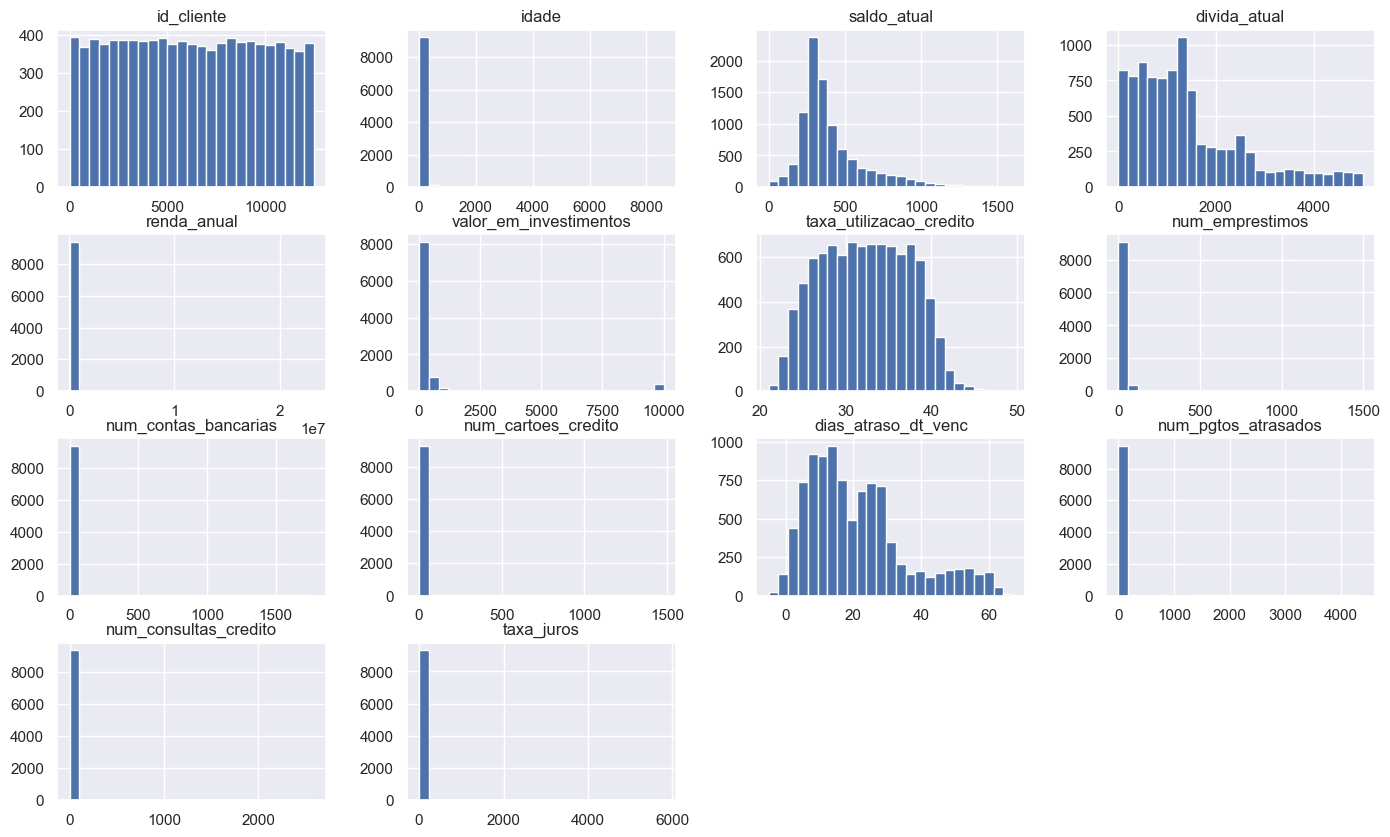

In [1337]:
# num attributes
num_attributes.hist(bins=25); 

### 1.5.1.1. Numerical Atributes Correlation

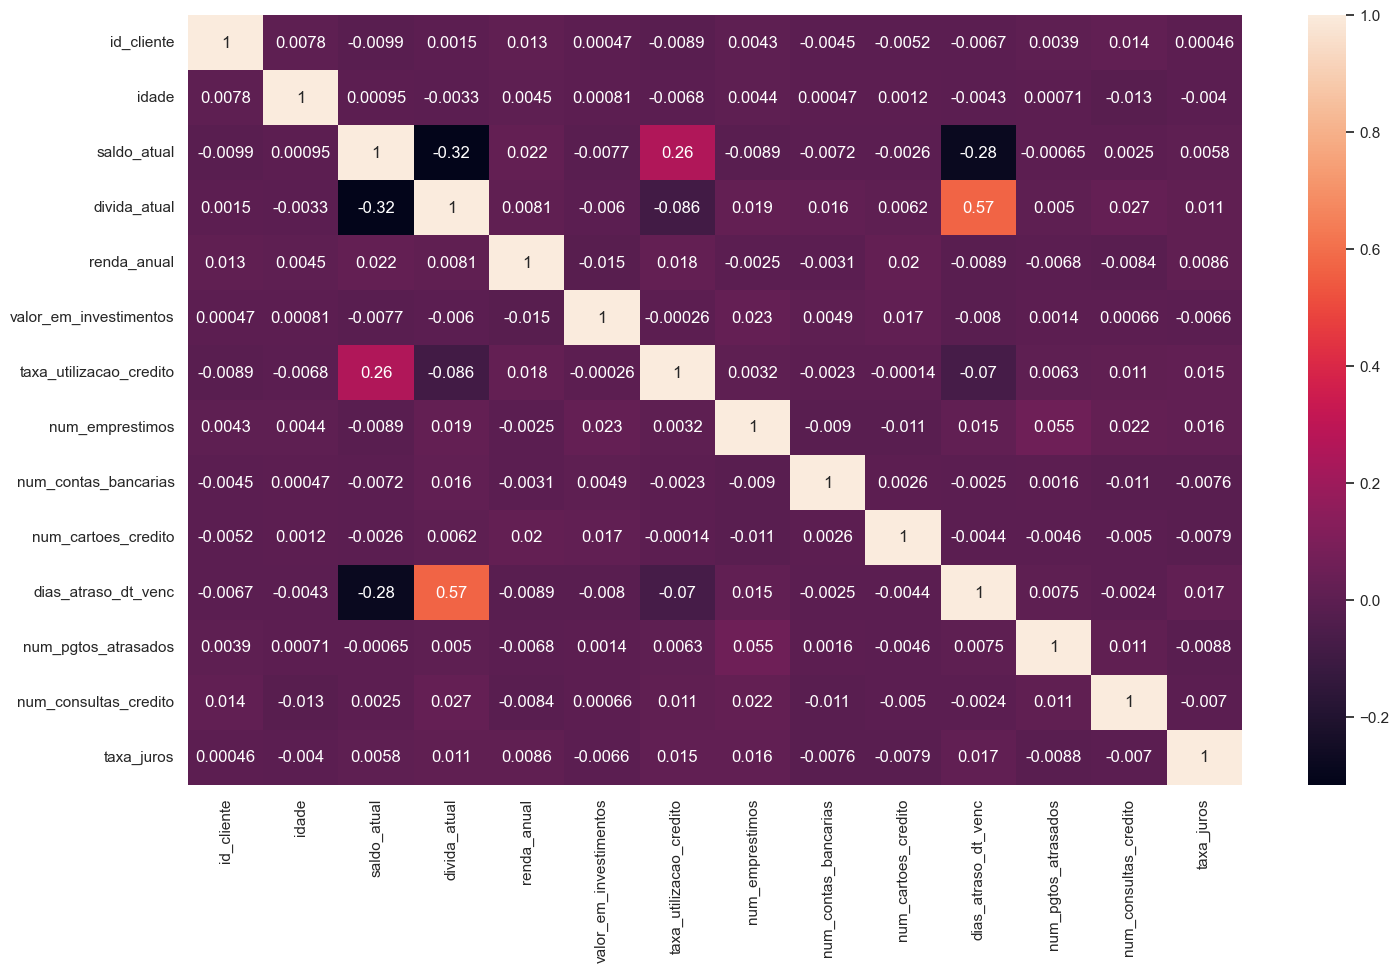

In [1338]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True);

# 2.0. FEATURE ENGINEERING

In [1388]:
df2 = df1.copy()

In [1389]:
df2.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


In [1390]:
# Criação de Variáveis

indice_endividamento = divida atual / renda anual
enfoderamento = numero de cartoes + numero de emprestimos + consultas de credito
relacao de cartoes = numero de cartoes / numero de contas
indice de juros = taxa de juros * numero de pagamentos atrasados
indice_id_tx = idade * taxa de utilizacao de credito
indice_id_pg_atr = idade / numero de pagamento atrasado


SyntaxError: invalid syntax (317606551.py, line 3)

In [1391]:
# Indice de Endividamento
df2['ind_end'] = df2['divida_atual'] / df2['renda_anual']

# Enfoderamento
df2['enfod'] = df2['num_cartoes_credito'] + df2['num_emprestimos'] + df2['num_consultas_credito']

# Relacao de Cartoes
df2['num_contas_bancarias'] = df2['num_contas_bancarias'].apply(lambda x: 1 if x < 1 else x )
df2['cartoes'] = df2['num_cartoes_credito'] / df2['num_contas_bancarias']

# Indice de Juros
df2['ind_juros'] = df2['taxa_juros'] * df2['num_pgtos_atrasados']

In [1392]:
df2.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,...,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional,ind_end,enfod,cartoes,ind_juros
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,...,14,9,15,Não,Não,Negar,0.106503,22,1.400000,210
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,...,23,10,18,Não,Não,Negar,0.128223,20,0.625000,414
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,...,13,3,15,Sim,Não,Negar,0.024643,9,2.000000,195
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,...,7,2,1,Sim,Não,Negar,0.013576,9,2.333333,7
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,...,10,8,20,Sim,Não,Negar,0.019972,17,0.875000,200


In [1393]:
df2.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional', 'ind_end',
       'enfod', 'cartoes', 'ind_juros'],
      dtype='object')

# 3.0. Filtragem de Variáveis

In [1533]:
df3 = df2.copy()

In [1534]:
df2.shape

(9500, 21)

In [1535]:
####### Aguardar

# Filtragem de linhas - Idade
df3 = df3[df3['idade'] < 102]
idade_median = df3['idade'].median()
df3['idade'] = df3['idade'].apply(lambda x: idade_median if x > 102 else x)


# Filtragem de linhas - Saldo Atual ( sem outliers )

# Filtragem de linhas - Divida Atual ( sem outliers )

# Filtragem de linhas - Renda Anual
#df3 = df3[df3['renda_anual'] < 200000 ]

# Filtragem de linhas - Valor em Investimentos
#df3 = df3[df3['valor_em_investimentos'] < 2000 ]

# Filtragem de linhas - Taxa Utilização Credito ( sem outliers )

# Filtragem de linhas - Numero de emprestimos
#df3 = df3[df3['num_emprestimos'] < 10]
num_empr_median = df3['num_emprestimos'].median()
df3['num_emprestimos'] = df3['num_emprestimos'].apply(lambda x: num_empr_median if x > 30 else x) #best

# Filtragem de linhas - Numero de contas bancarias
df3 = df3[df3['num_contas_bancarias'] < 11]
num_conta_median = df3['num_contas_bancarias'].median()
df3['num_contas_bancarias'] = df3['num_contas_bancarias'].apply(lambda x: num_conta_median if x > 11 else x) #best

# Filtragem de linhas - Numero de cartoes                #Boa opção
df3 = df3[df3['num_cartoes_credito'] < 11]
num_cartao_median = df3['num_cartoes_credito'].median()
df3['num_cartoes_credito'] = df3['num_cartoes_credito'].apply(lambda x: num_cartao_median if x > 11 else x) #best

# Filtragem de linhas - Dias Atraso Dt Vencimento ( sem outliers)

# Filtragem de linhas - Numero de pagamentos atrasados    # Boa opção
#df3 = df3[df3['num_pgtos_atrasados'] < 30]
#num_pgto_median = df3['num_pgtos_atrasados'].median()
#df3['num_pgtos_atrasados'] = df3['num_pgtos_atrasados'].apply(lambda x: num_pgto_median if x >=85 else x) # Best

# Filtragem de linhas - Numero de consultas de credito
#df3 = df3[df3['num_consultas_credito'] < 13]
#num_consul_median = df3['num_consultas_credito'].median()
#df3['num_consultas_credito'] = df3['num_consultas_credito'].apply(lambda x: num_consul_median if x >= 60 else x) # Best

# Filtragem de linhas - Taxa Juros ( sem outliers )
#df3 = df3[df3['taxa_juros'] < 35]

#df3 = df3.drop( columns=['pessoa_polit_exp', 'investe_exterior'], axis=1 )

In [1536]:
len(df3[df3['idade'] > 102])

0

In [1208]:
len( df3[df3['renda_anual'] > 200000 ] )

107

In [1209]:
len( df3[df3['valor_em_investimentos'] > 9000 ] )

410

In [1210]:
len(df3[df3['num_emprestimos'] > 10])

407

In [1211]:
len( df3[df3['num_contas_bancarias'] > 11] )

125

In [1212]:
len(df3[df3['num_cartoes_credito'] > 40]) 

206

In [1213]:
len( df3[df3['num_pgtos_atrasados'] > 30] )

66

In [1214]:
len( df3[df3['num_consultas_credito'] > 15] )

150

In [1215]:
len( df3[df3['taxa_juros'] > 45] )

175

In [1238]:
df3.shape

(9221, 17)

In [1158]:
df3.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


In [1159]:
df3[df3['limite_adicional'] == 'Negar'].count()

id_cliente                 7267
idade                      7267
saldo_atual                7267
divida_atual               7267
renda_anual                7267
valor_em_investimentos     7267
taxa_utilizacao_credito    7267
num_emprestimos            7267
num_contas_bancarias       7267
num_cartoes_credito        7267
dias_atraso_dt_venc        7267
num_pgtos_atrasados        7267
num_consultas_credito      7267
taxa_juros                 7267
investe_exterior           7267
pessoa_polit_exp           7267
limite_adicional           7267
dtype: int64

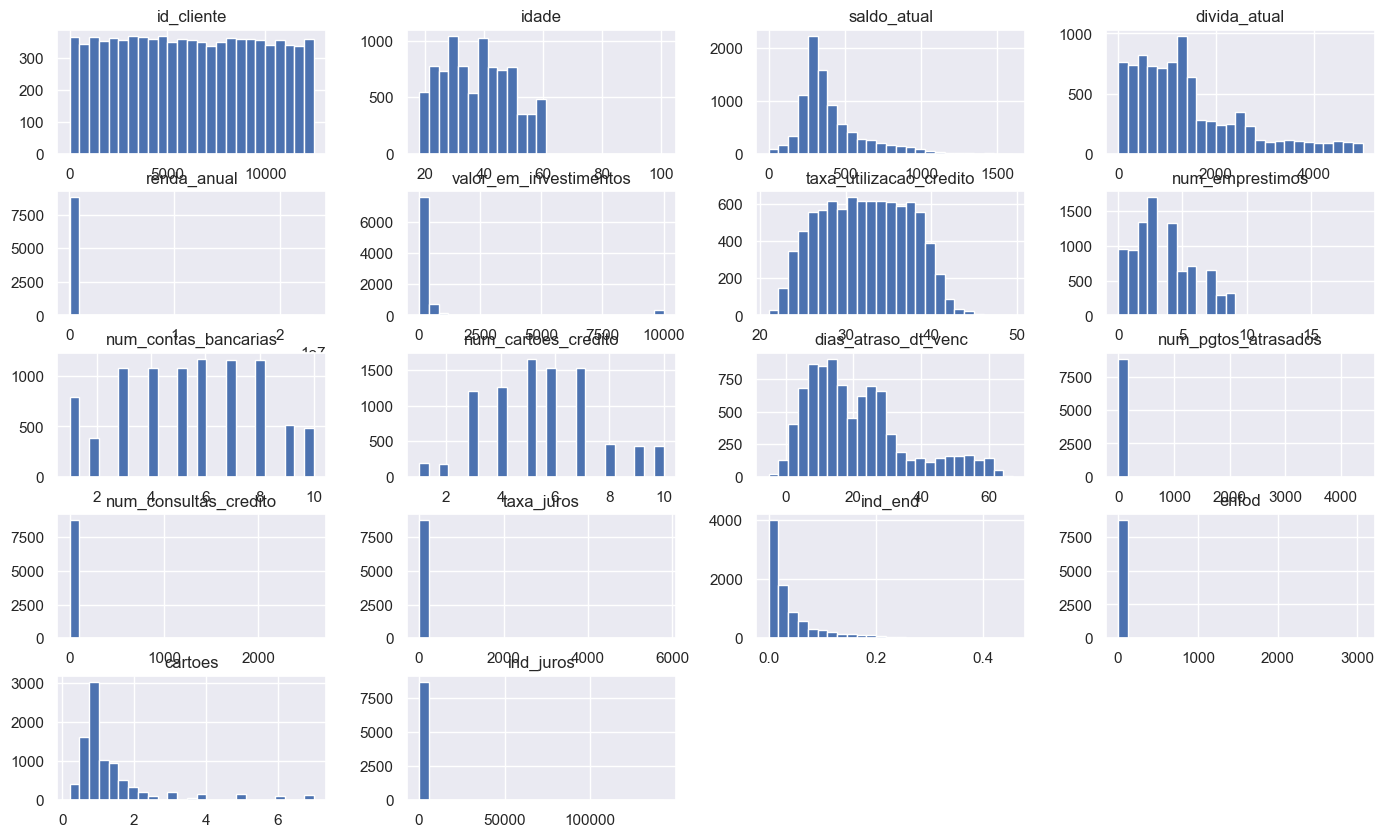

In [1513]:
df3.hist(bins=25); 

## 3.1. Estudo de "investe_exterior"	

In [1161]:
aux = df3[df3['investe_exterior'] == 'Sim' ]

In [167]:
len(aux)

2323

In [168]:
aux2 = aux[aux['limite_adicional'] == 'Negar' ]

In [169]:
len(aux2)

1918

## 3.2. Estudo de "pessoa_polit_exp"	

In [161]:
aux = df3[df3['pessoa_polit_exp'] == 'Sim' ]

In [164]:
len(aux)

583

In [162]:
aux2 = aux[aux['limite_adicional'] == 'Negar' ]

In [163]:
len(aux2)

504

## 3.3. Estudo de "saldo_atual"	

In [226]:
aux_saldo = df3[df3['saldo_atual'] < 1500]

In [227]:
len(aux_saldo)

9496

In [231]:
aux_saldo2 = df3[df3['saldo_atual'] > 1500]

In [233]:
aux_saldo2

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
5591,1173,33,1602.040519,685.01,1.750612e+05,10000.000000,39.432897,0,0,6,8,8,0,6,Não,Não,Negar
5957,8501,23,1552.946094,1182.91,1.748538e+05,121.328983,49.564519,1,5,5,13,9,3,9,Sim,Não,Negar
6529,4271,1914,1508.926823,390.13,1.062651e+07,189.964843,36.558504,0,1,5,-1,1,3,2548,Não,Não,Conceder
8028,4135,36,1567.208309,708.22,1.754756e+05,149.965691,40.541257,0,4,3,4,8,4,7,Não,Não,Conceder


## 3.4. Estudo de "renda_anual"	

In [262]:
aux_saldo = df3[df3['renda_anual'] < 200000]

In [263]:
len(aux_saldo)

9393

In [273]:
aux_saldo2 = df3[df3['renda_anual'] > 200000]

In [274]:
len(aux_saldo2)

107

In [277]:
aa = aux_saldo2[aux_saldo2['limite_adicional'] == 'Conceder' ]

In [278]:
len(aa)

12

## 3.5. Estudo de "valor_em_investimentos"	

In [287]:
aux_saldo = df3[df3['valor_em_investimentos'] < 2000 ]

In [288]:
len(aux_saldo)

9090

In [293]:
aux_saldo2 = df3[df3['valor_em_investimentos'] > 9000]

In [294]:
len(aux_saldo2)

410

In [295]:
aa = aux_saldo2[aux_saldo2['limite_adicional'] == 'Conceder' ]

In [296]:
len(aa)

66

## 3.5. Estudo de "taxa_juros"	

In [405]:
aux_saldo = df3[df3['taxa_juros'] < 35 ]

In [406]:
len(aux_saldo)

9325

In [407]:
aux_saldo2 = df3[df3['taxa_juros'] > 35]

In [408]:
len(aux_saldo2)

175

In [389]:
aa = aux_saldo2[aux_saldo2['limite_adicional'] == 'Conceder' ]

In [390]:
len(aa)

24

In [113]:
# Idade: Temos 106 linhas de outliers com idades acima de 101 anos (que seria o limite máximo real)

# Numero de emprestimos: Temos 406 linhas de possiveis outliers com numero de emprestimos a partir de 92

# Numero de contas bancarias: Temos 125 linhas de possiveis outliers com numero de contas a partir de 32

# Numero de cartoes: Temos 212 linhas de possiveis outliers com numero de cartoes a partir de 16

# Numero de pagamentos atrasados: Temos 66 linhas de possiveis outliers com pagamentos a partir de 84

# Numero de consultas de credito: Temos 150 linhas de possiveis outliers com numero de consultas a partir de 59

# Investem no Exterior - 2323 Investem (  405 Concedidos / 1918 negados )

# Pessoas politicamente Expostas  - 583 ( 79 Concedidos / 504 Negados)




# 4.0. Análise Exploratória dos Dados

In [20]:
df4 = df3.copy()

## 4.1. Análise Univariada

## 4.1. Variável Resposta

In [74]:
le_y = pickle.load(open('le_y.pkl', 'rb'))
aux = df4.copy()

aux['limite_adicional'] = le_y.transform(aux['limite_adicional'])

In [75]:
# 1 = Negar, 0 = Conceder
aux = df4.copy()
aux['limite_adicional'].value_counts(normalize=True)

0    0.842425
1    0.157575
Name: limite_adicional, dtype: float64

## 4.2. Idade

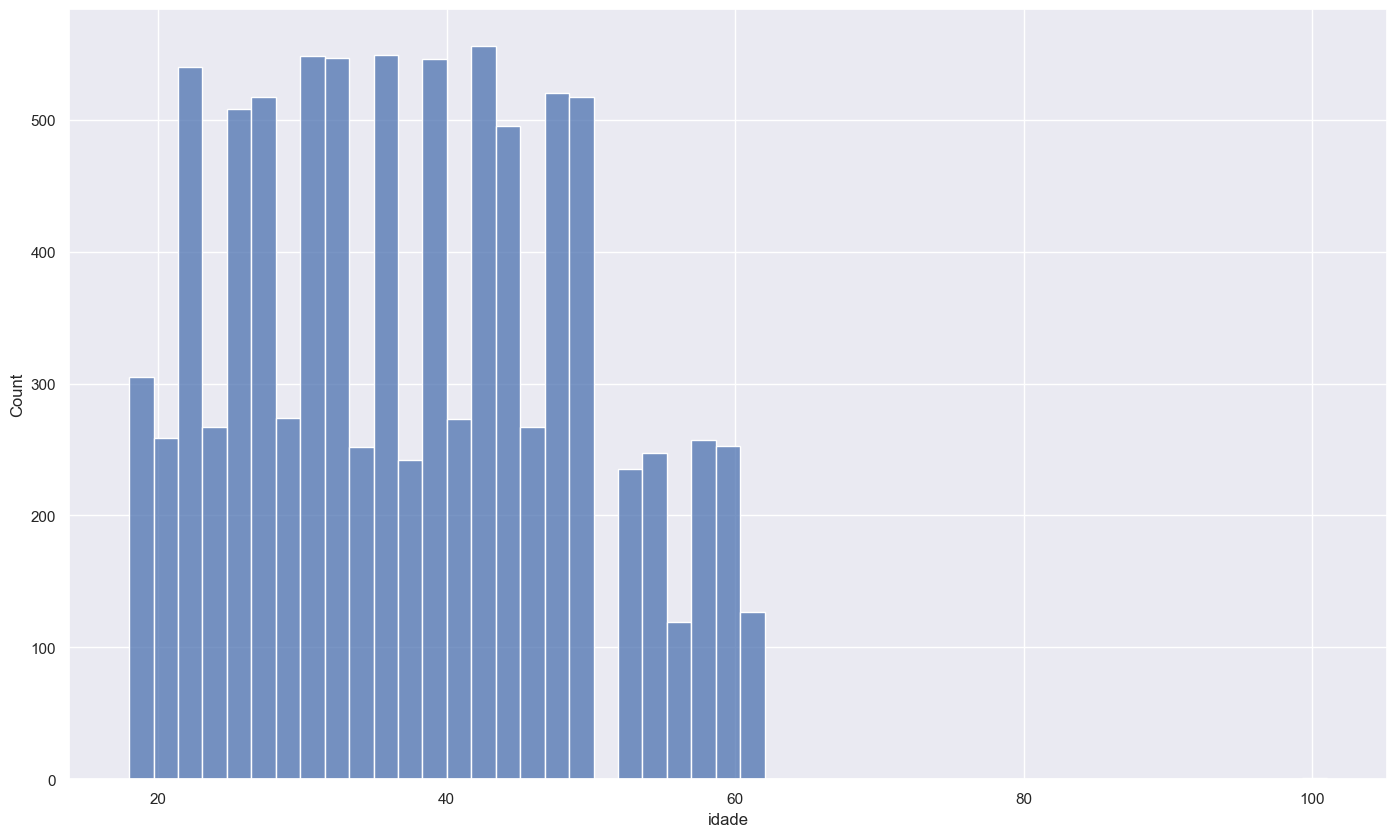

In [28]:
# Plotando gráfico de distribuição
sns.histplot( x='idade', data=df4);

## 4.3. Saldo Atual

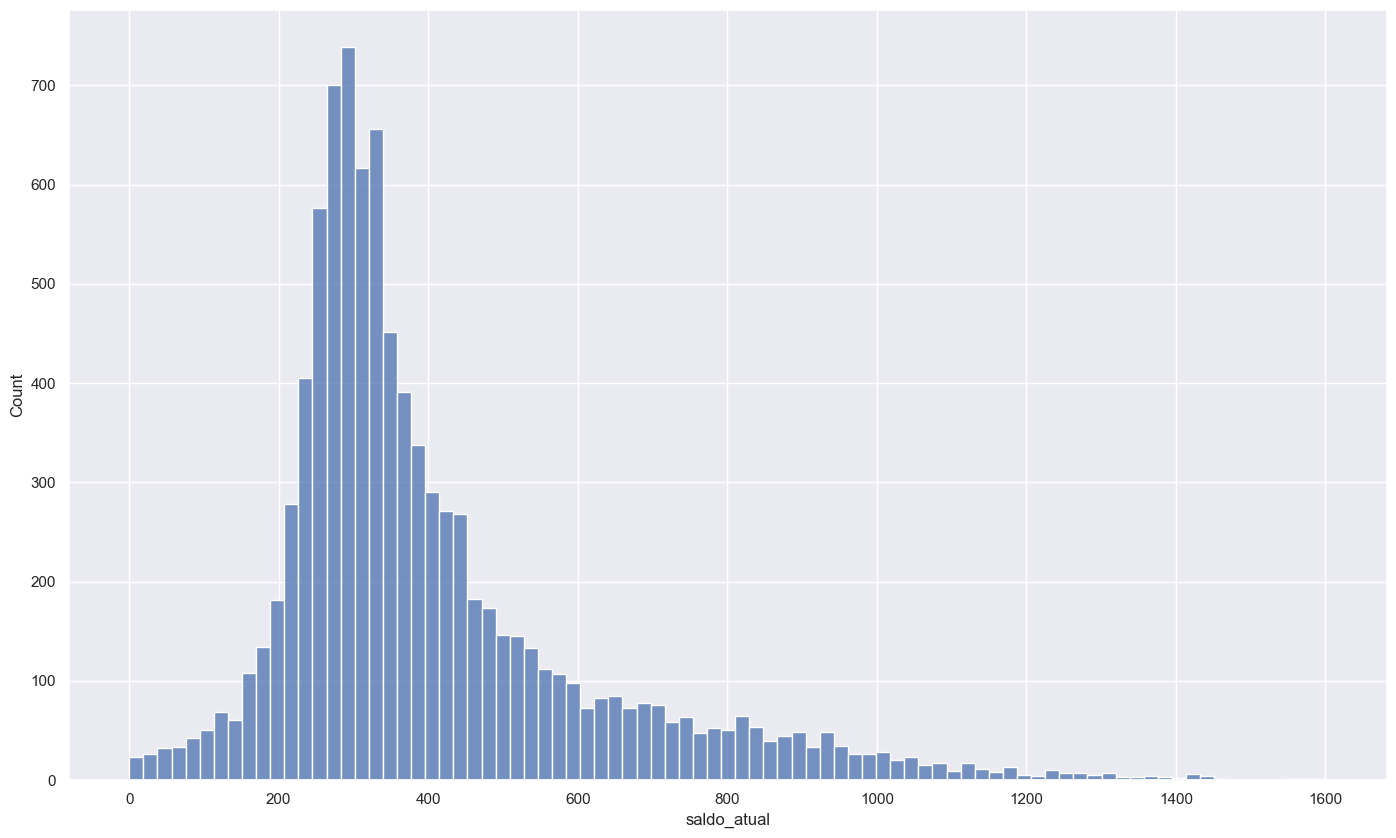

In [29]:
sns.histplot( x='saldo_atual', data=df4 );

## 4.4. Dívida Atual

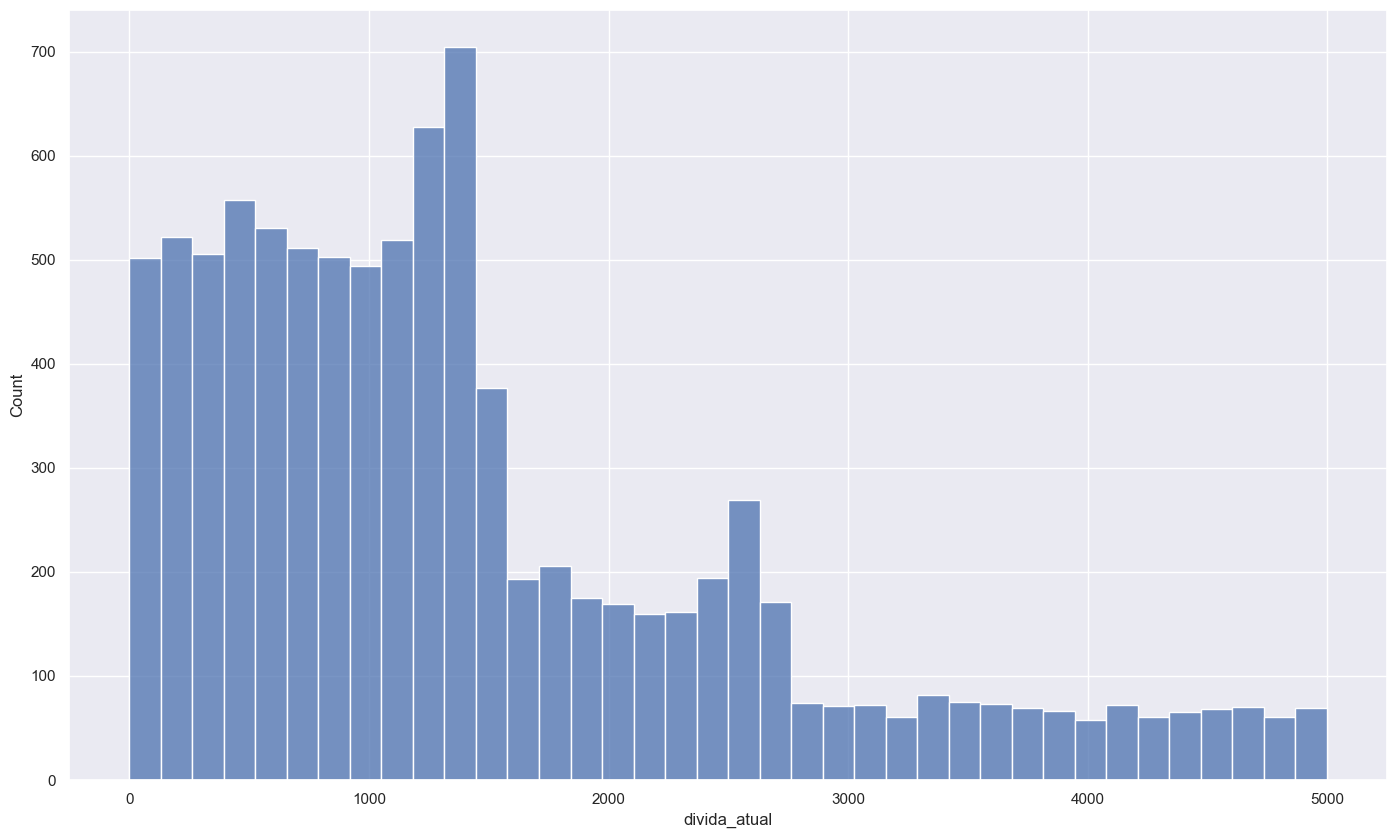

In [30]:
sns.histplot( x='divida_atual', data=df4 );

## 4.5. Renda Anual

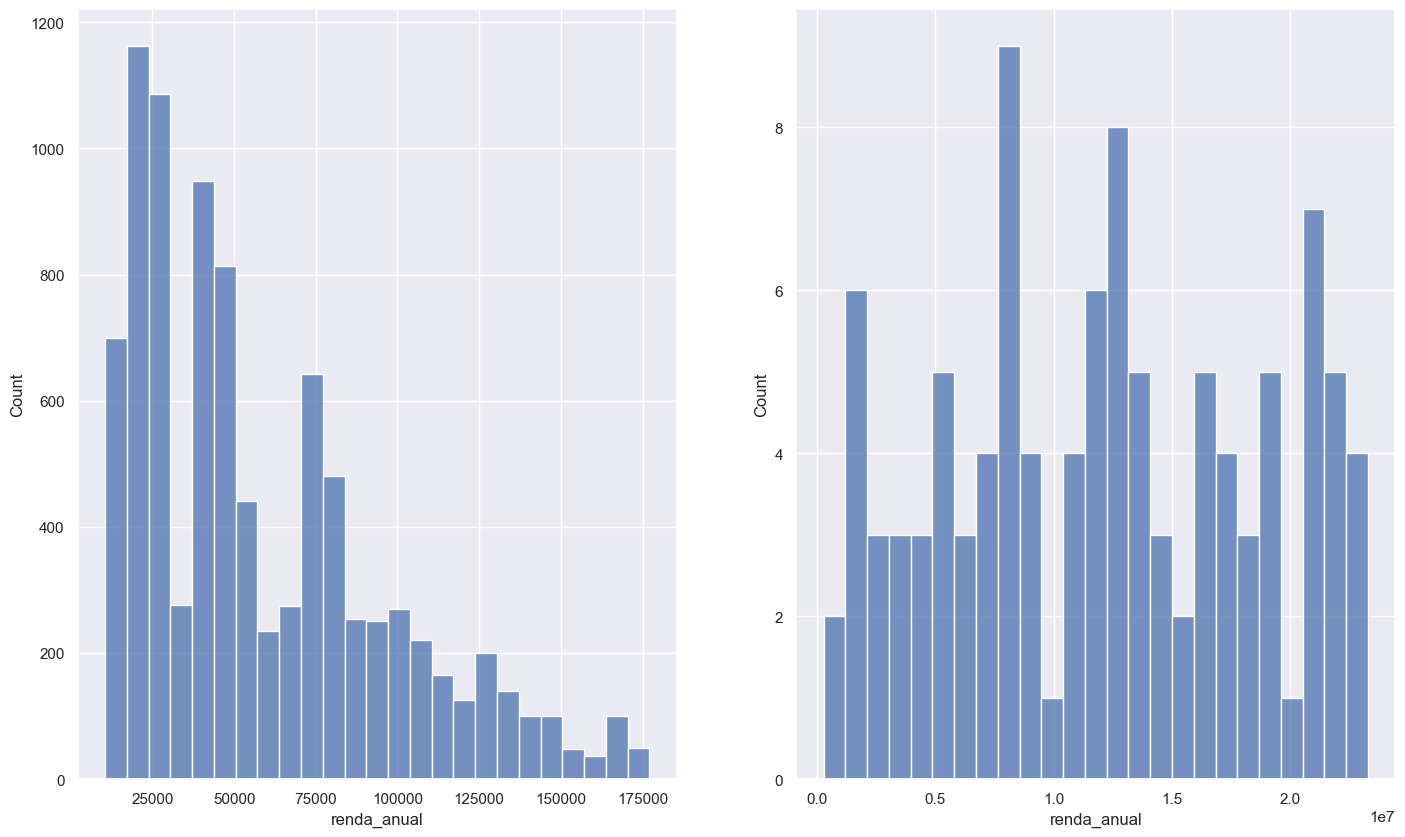

In [32]:
aux1 = df4.loc[ df4['renda_anual'] < 200000, : ]
aux2 = df4.loc[ df4['renda_anual'] > 200000, : ]

plt.subplot( 1, 2, 1 )
sns.histplot( x='renda_anual', data=aux1, bins=25 );

plt.subplot( 1, 2, 2 )
sns.histplot( x='renda_anual', data=aux2, bins=25 ); 

## 4.6. Valor em Investimentos

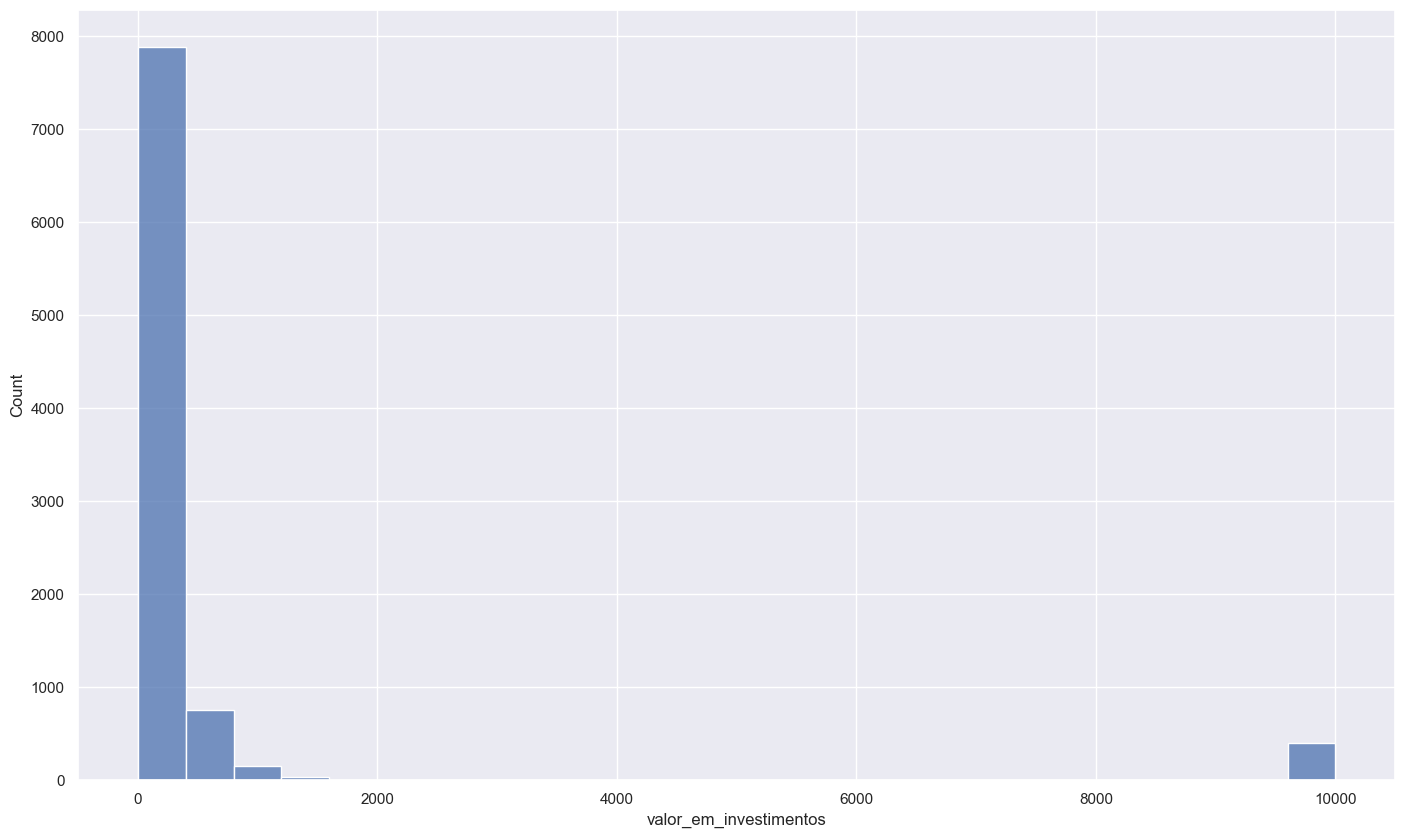

In [33]:
sns.histplot( x='valor_em_investimentos', data=df4, bins=25 );

## 4.7. Taxa de Utilização de Crédito

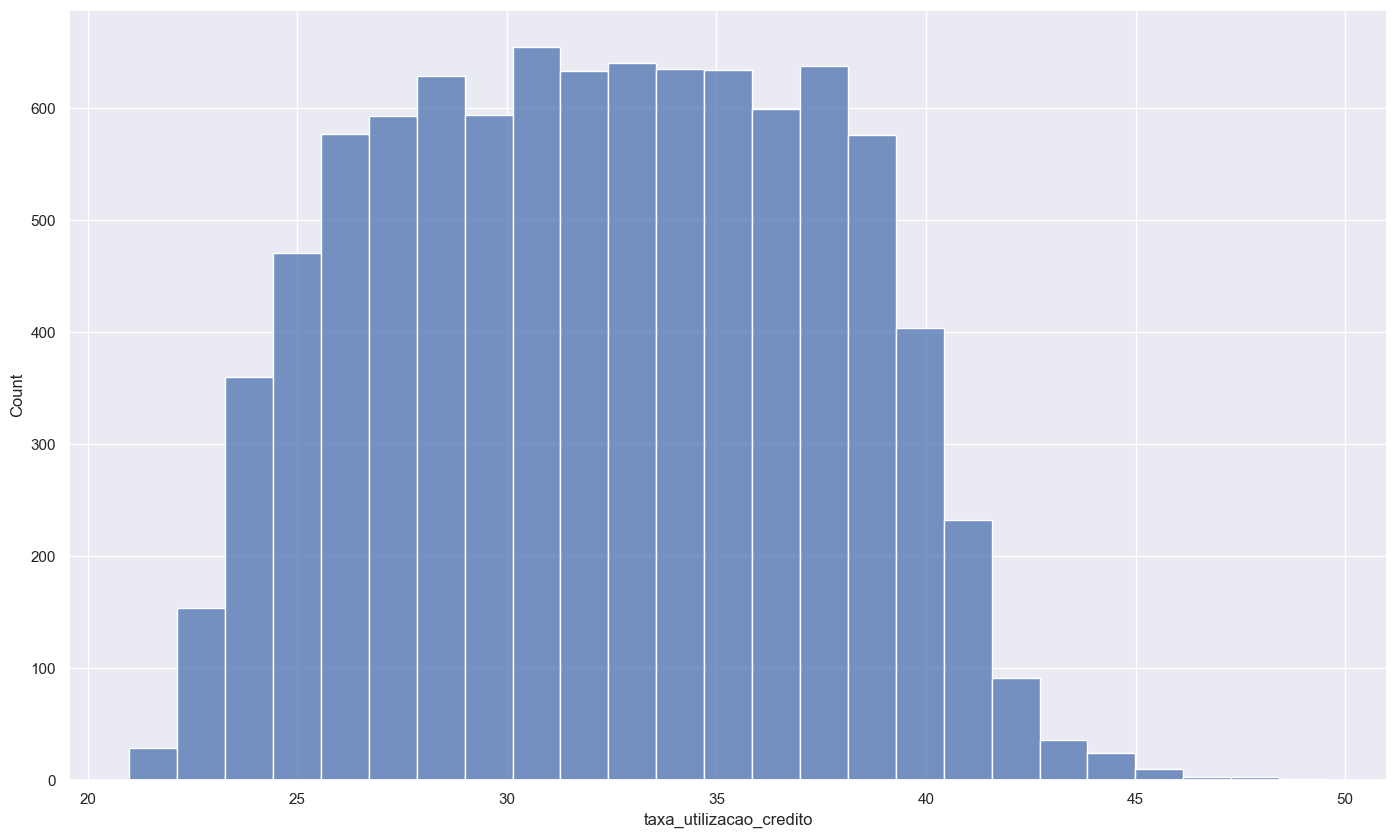

In [34]:
sns.histplot( x='taxa_utilizacao_credito', data=df4, bins=25 );

## 4.8. Número de Empréstimos

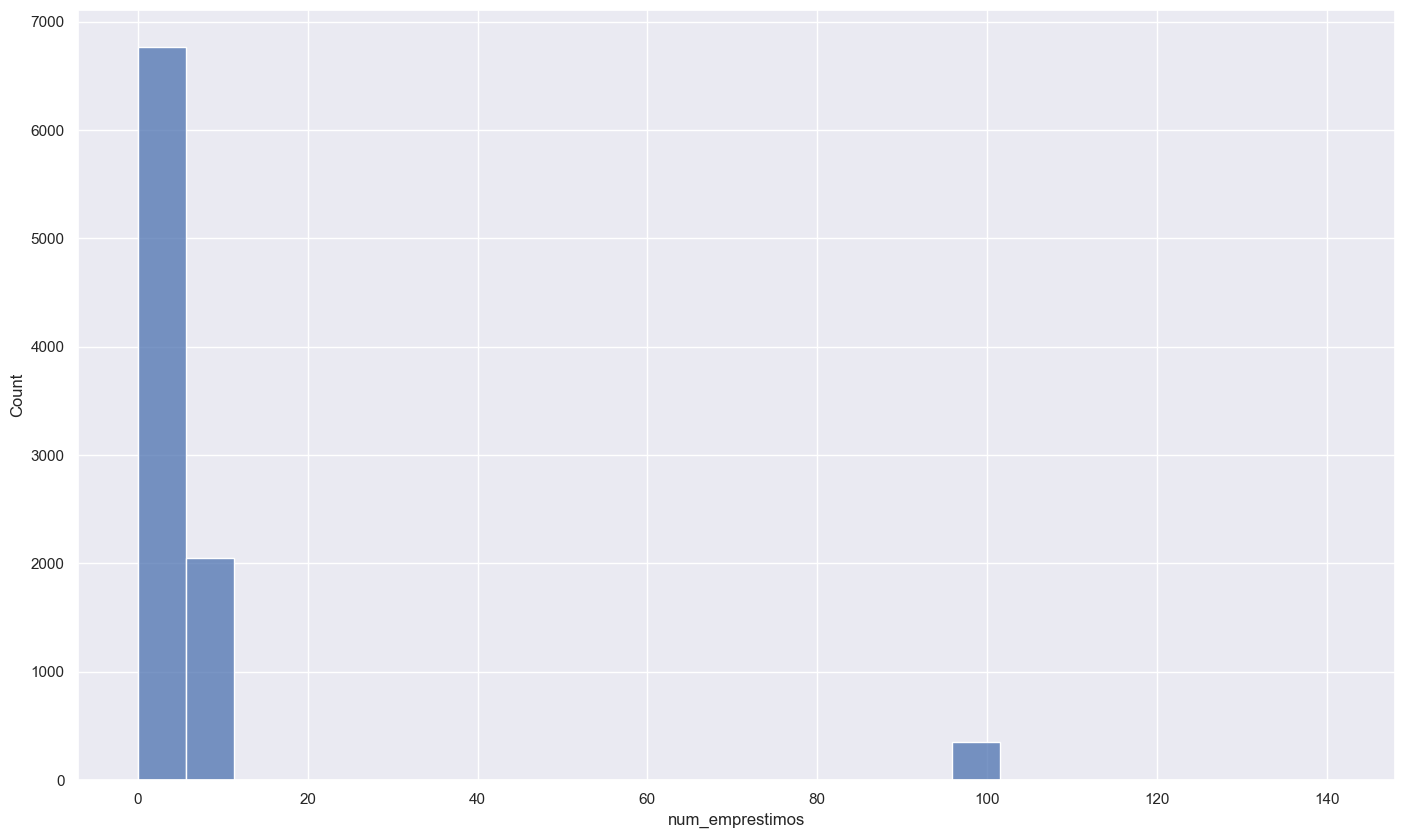

In [1474]:
aux1 = df4.loc[ df4['num_emprestimos'] < 150, : ]
sns.histplot( x='num_emprestimos', data=aux1, bins=25 );

## 4.9. Número de Contas Bancárias

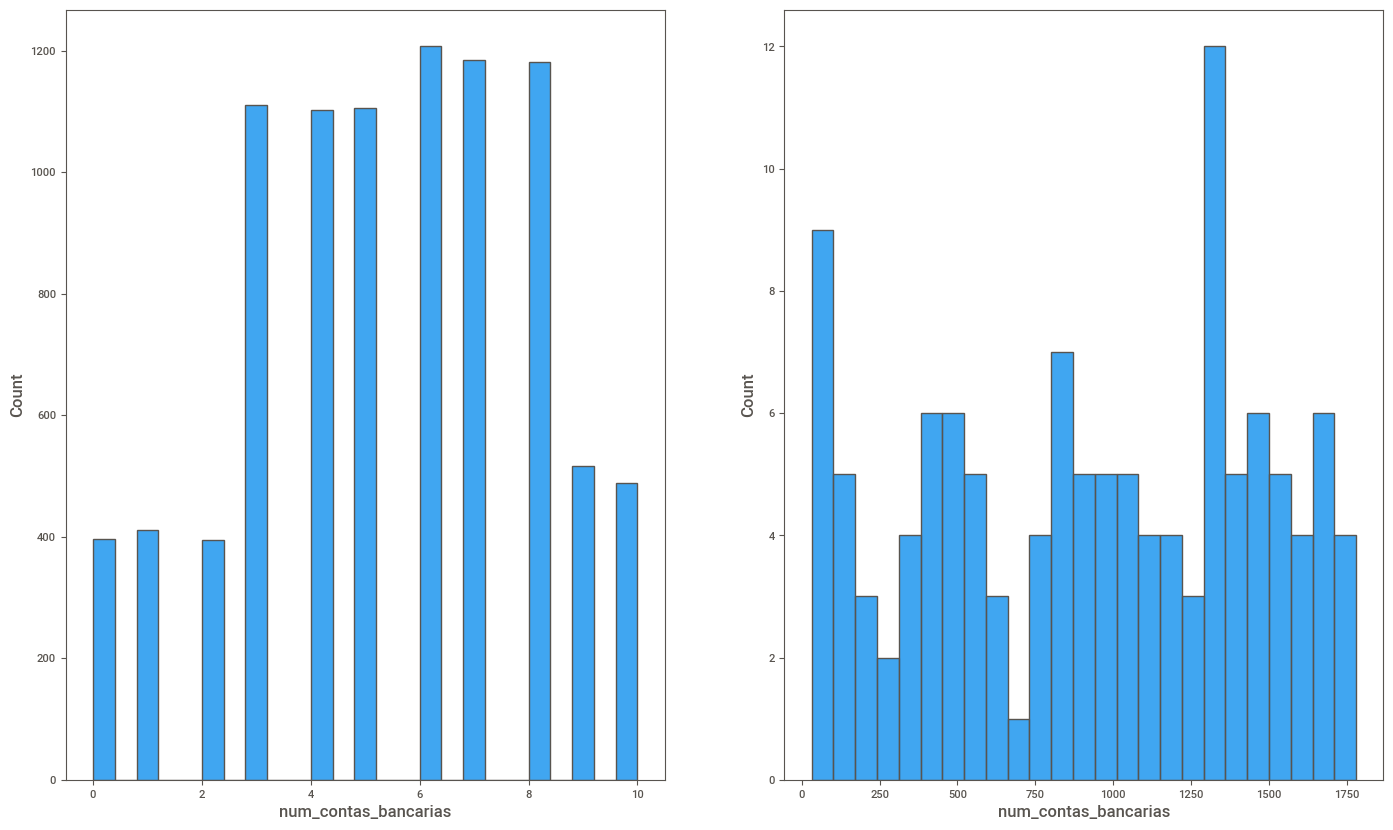

In [178]:
aux1 = df4.loc[ df4['num_contas_bancarias'] < 11, : ]
aux2 = df4.loc[ df4['num_contas_bancarias'] > 30, : ]

plt.subplot( 1, 2, 1 )
sns.histplot( x='num_contas_bancarias', data=aux1, bins=25 );

plt.subplot( 1, 2, 2 )
sns.histplot( x='num_contas_bancarias', data=aux2, bins=25 );

In [1505]:
aux4 = df4.loc[ df4['num_contas_bancarias'] < 11, : ].count()
aux4

id_cliente                 9098
idade                      9098
saldo_atual                9098
divida_atual               9098
renda_anual                9098
valor_em_investimentos     9098
taxa_utilizacao_credito    9098
num_emprestimos            9098
num_contas_bancarias       9098
num_cartoes_credito        9098
dias_atraso_dt_venc        9098
num_pgtos_atrasados        9098
num_consultas_credito      9098
taxa_juros                 9098
investe_exterior           9098
pessoa_polit_exp           9098
limite_adicional           9098
idade_agrupada             9098
saldo_atual_agrupado       9098
dtype: int64

In [1509]:
aux2 = df4.loc[ df4['num_cartoes_credito'] >= 10, : ].count()
aux2


id_cliente                 648
idade                      648
saldo_atual                648
divida_atual               648
renda_anual                648
valor_em_investimentos     648
taxa_utilizacao_credito    648
num_emprestimos            648
num_contas_bancarias       648
num_cartoes_credito        648
dias_atraso_dt_venc        648
num_pgtos_atrasados        648
num_consultas_credito      648
taxa_juros                 648
investe_exterior           648
pessoa_polit_exp           648
limite_adicional           648
idade_agrupada             648
saldo_atual_agrupado       648
dtype: int64

## 4.9. Número de Cartões de Crédito

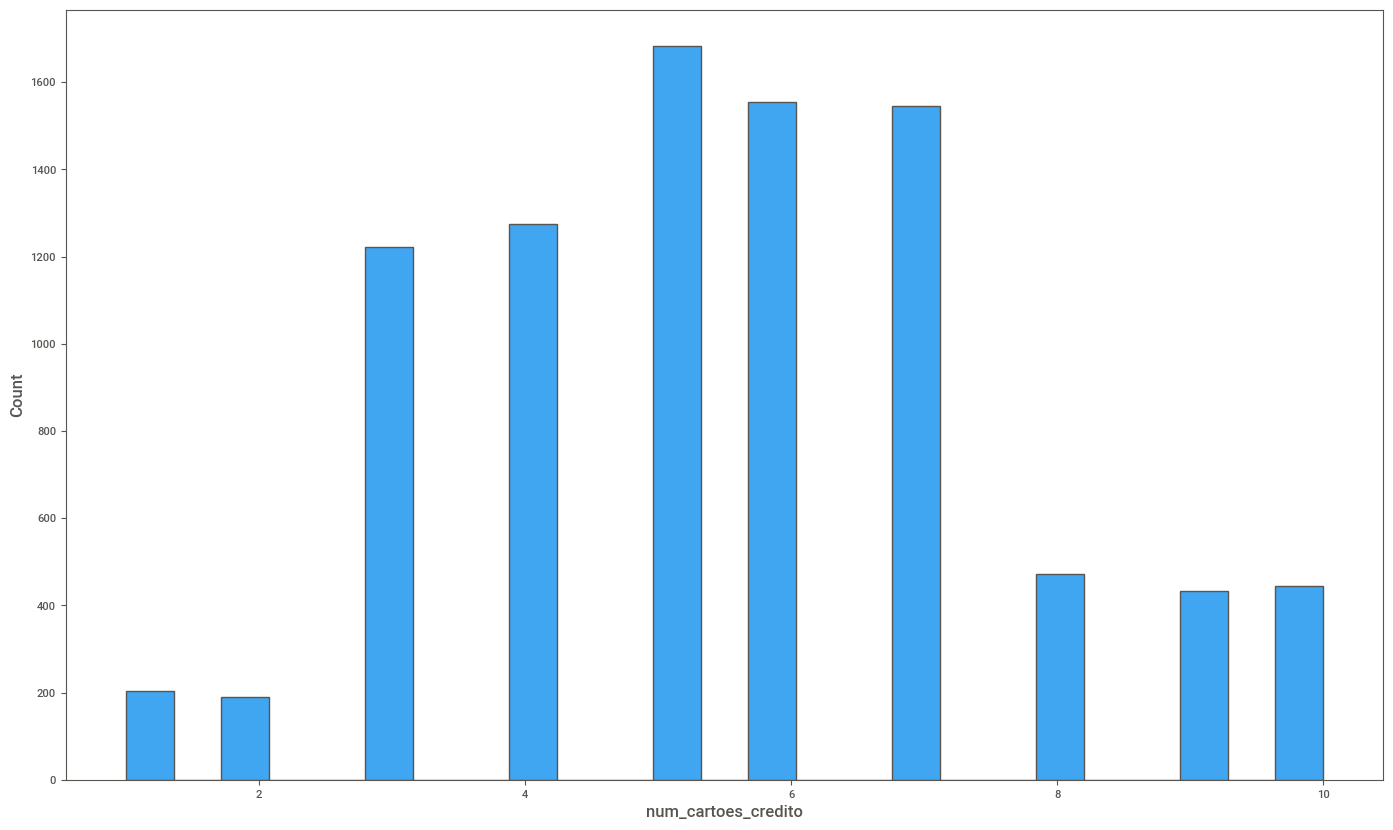

In [181]:
aux1 = df4.loc[ df4['num_cartoes_credito'] < 11, : ]
aux2 = df4.loc[ df4['num_cartoes_credito'] > 10, : ]

sns.histplot( x='num_cartoes_credito', data=aux1, bins=25 );

## 4.9. Dias de Atraso de Data de Vencimento

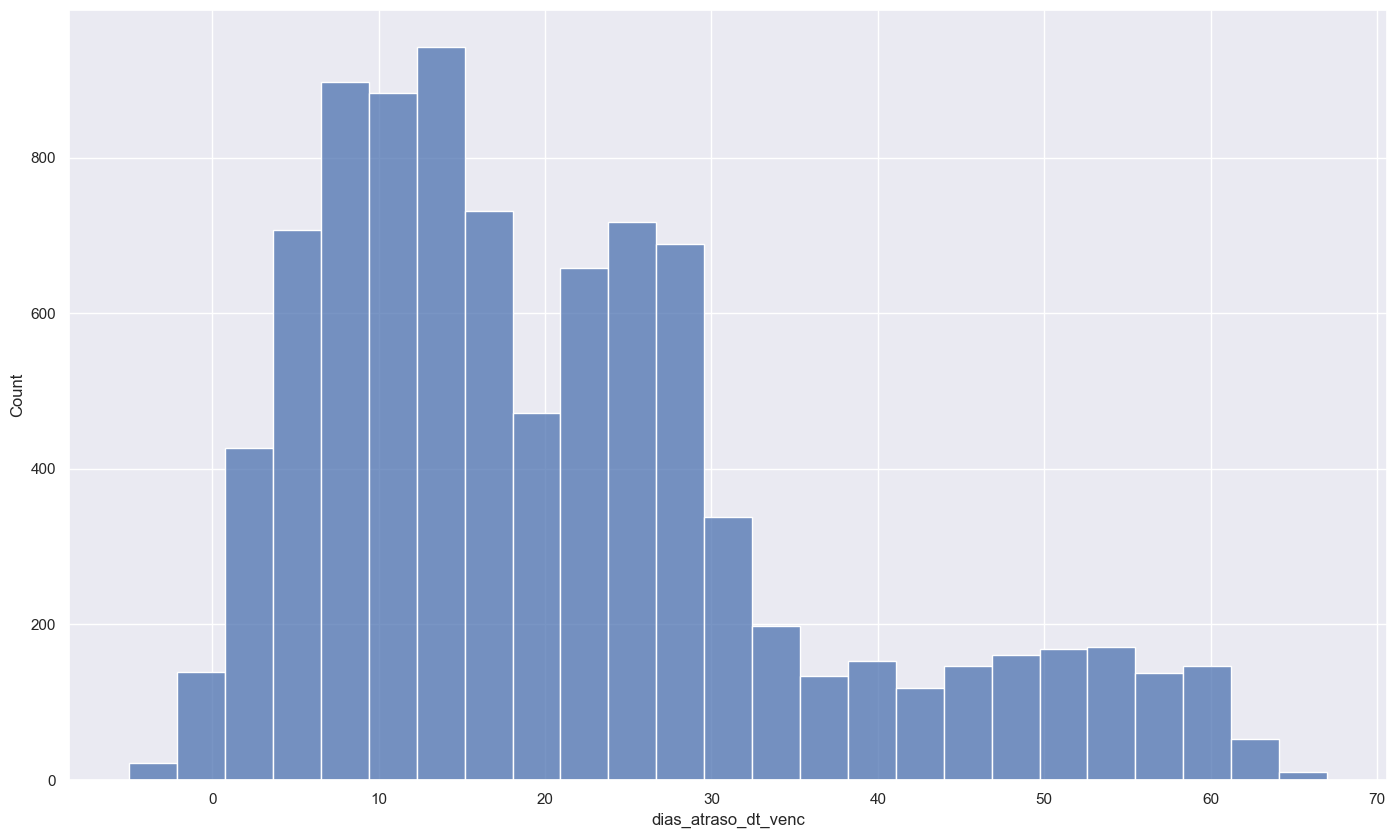

In [38]:
sns.histplot( x='dias_atraso_dt_venc', data=df4, bins=25 );

## 4.10. Número de Pagamentos Atrasados

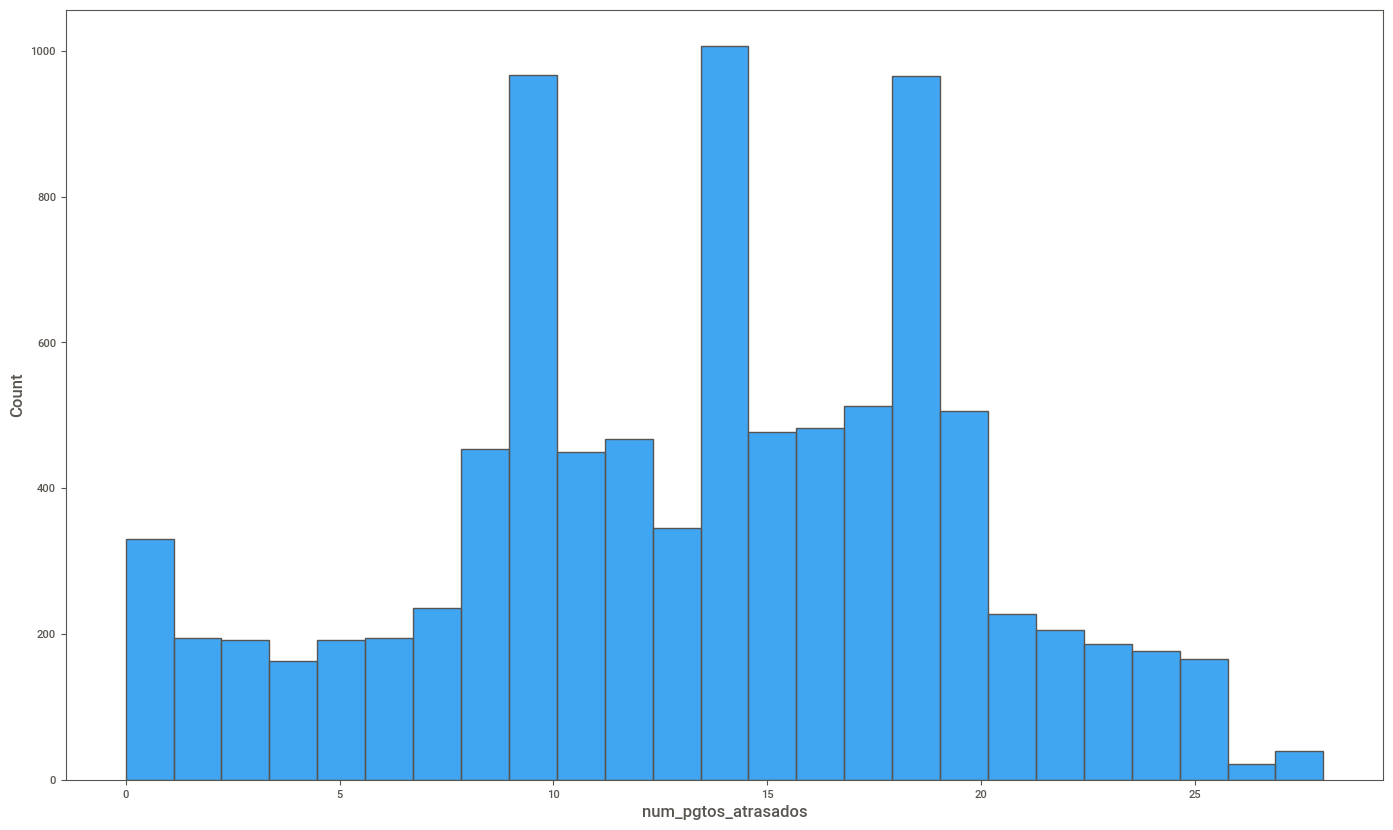

In [187]:
aux1 = df4.loc[ df4['num_pgtos_atrasados'] < 30, : ]
aux2 = df4.loc[ df4['num_pgtos_atrasados'] > 30, : ]

sns.histplot( x='num_pgtos_atrasados', data=aux1, bins=25 );


## 4.11. Número Consultas de Crédito

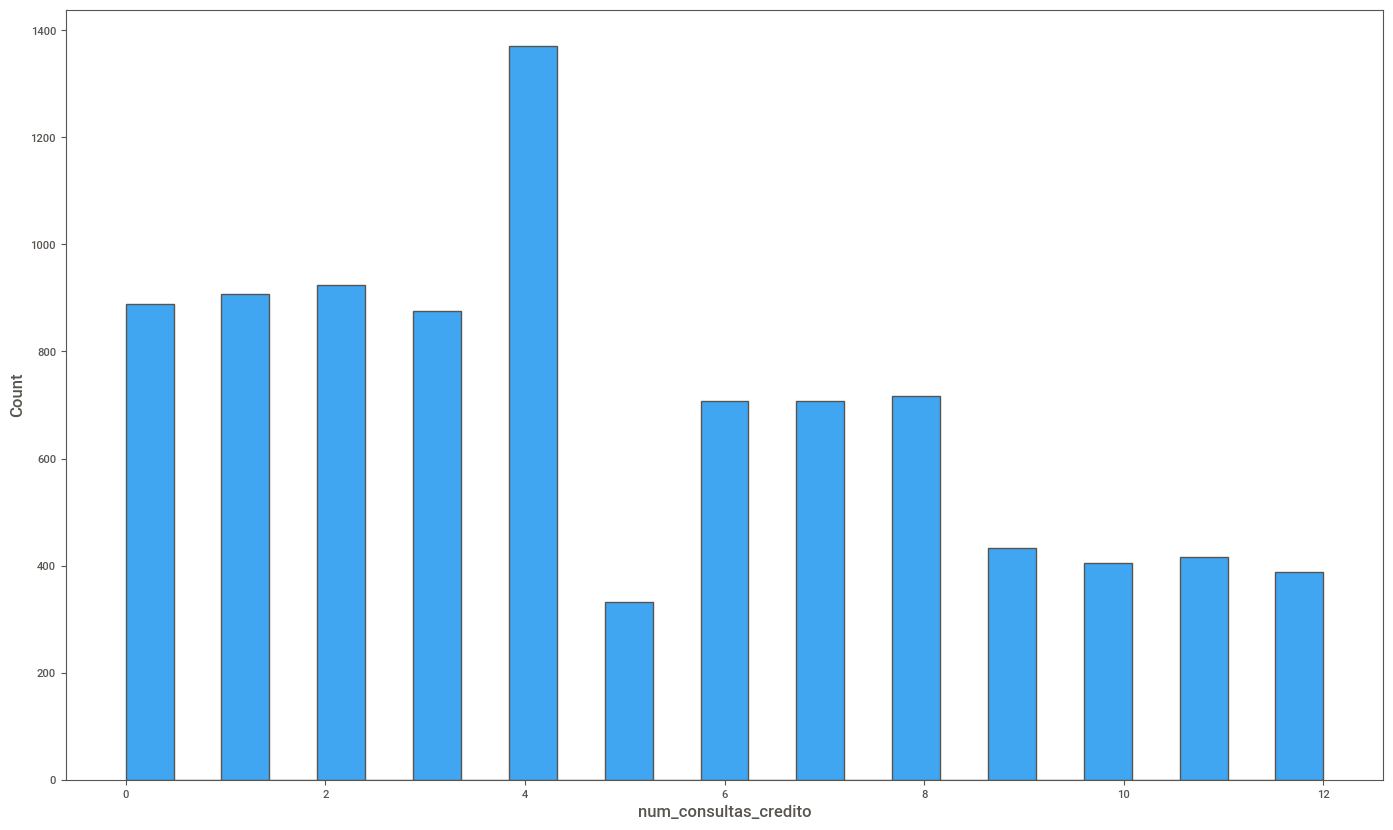

In [190]:
aux1 = df4.loc[ df4['num_consultas_credito'] < 20, : ]
aux2 = df4.loc[ df4['num_consultas_credito'] > 30, : ]
sns.histplot( x='num_consultas_credito', data=aux1, bins=25 );

## 4.12. Taxa de Juros

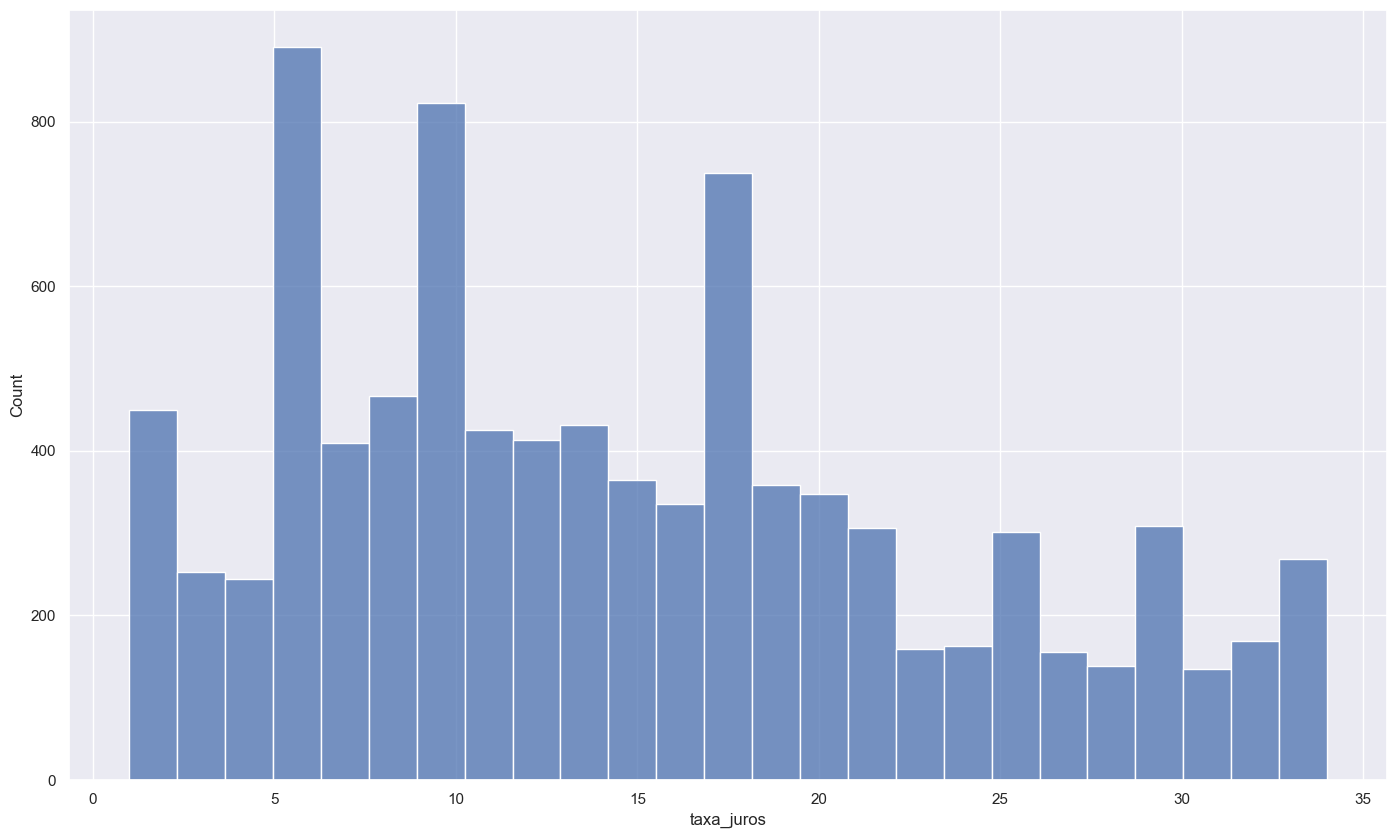

In [41]:
aux1 = df4.loc[ df4['taxa_juros'] < 50, : ]
aux2 = df4.loc[ df4['taxa_juros'] > 50, : ]

sns.histplot( x='taxa_juros', data=aux1, bins=25 );

In [42]:
df4.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional'],
      dtype='object')

## 4.2. Análise Bivariada

### 4.2.1. Idade

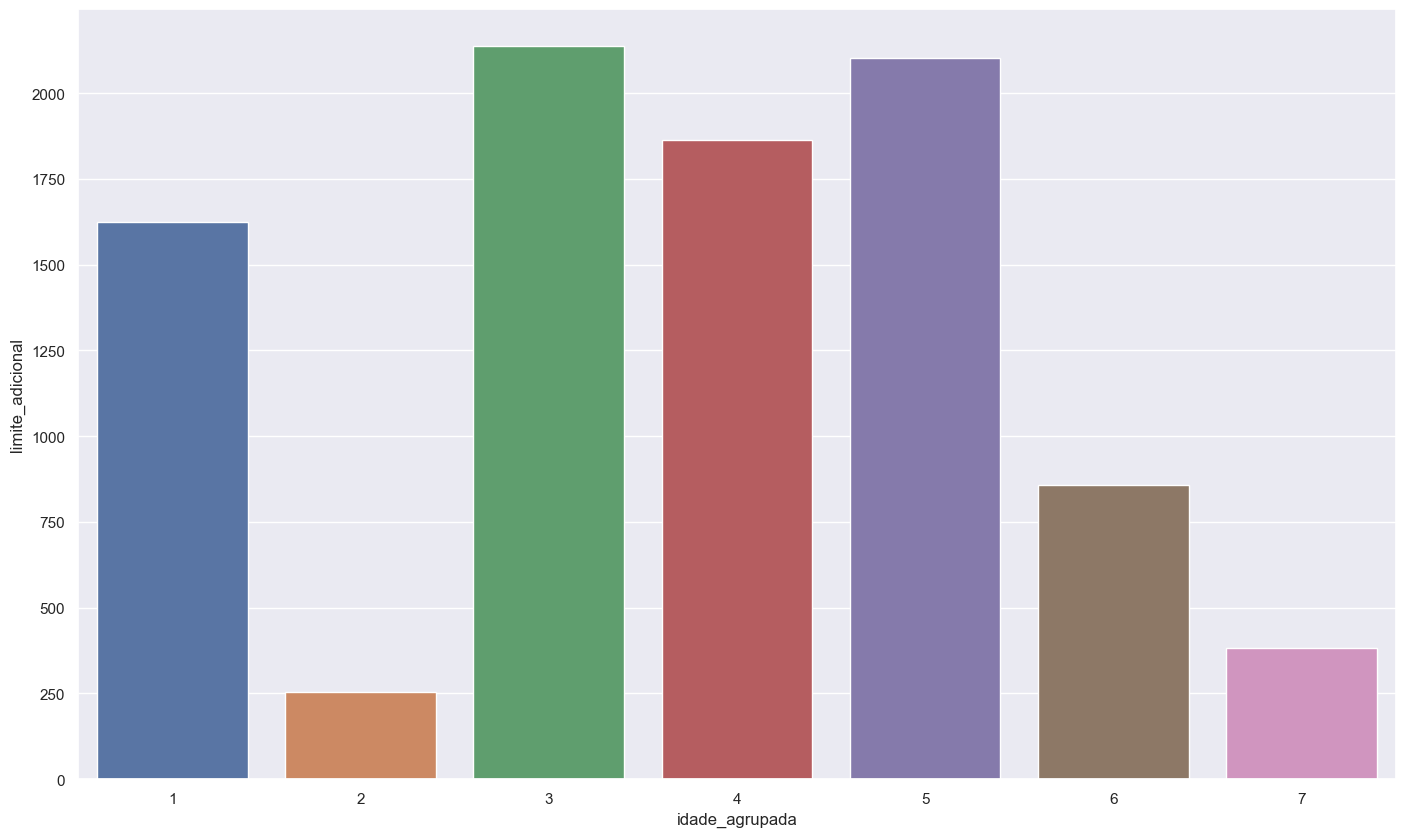

In [47]:
# Agrupando as idades blocos
df4['idade_agrupada'] = df4['idade'].apply( lambda x: 1 if x < 26 else
                                                               2 if ( 26 >= x < 34 ) else
                                                               3 if ( 34 >= x < 42 ) else
                                                               4 if ( 42 >= x < 50 ) else
                                                               5 if ( 50 >= x < 58 ) else
                                                               6 if ( 58 >= x < 64 ) else
                                                               7)


# Plotando o número de negações por grupo
aux1 = df4[['idade_agrupada', 'limite_adicional']].groupby( 'idade_agrupada' ).count().reset_index()
sns.barplot(x='idade_agrupada', y='limite_adicional', data=aux1);

### 4.2.2. Saldo Atual

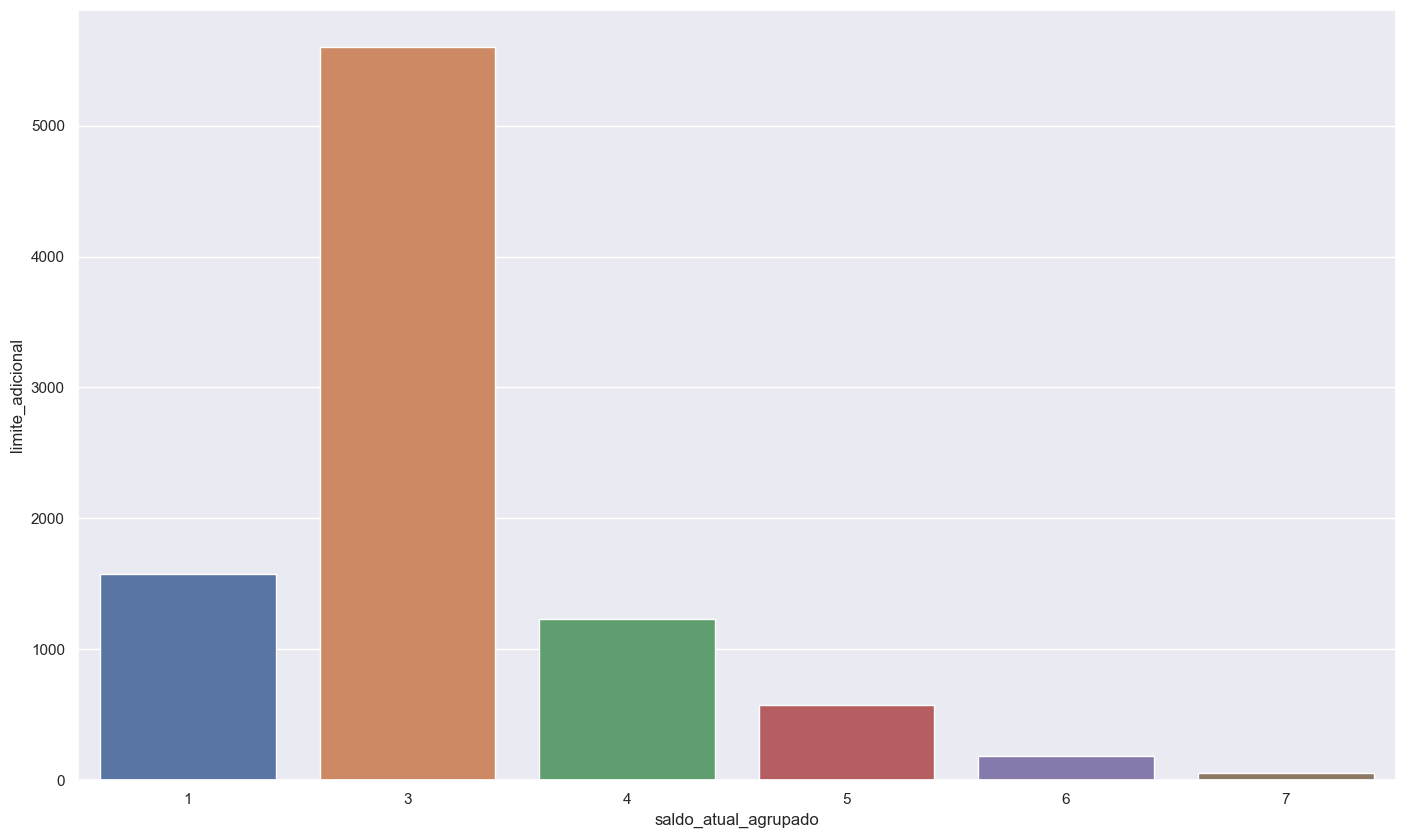

In [48]:
# Agrupando as idades blocos
df4['saldo_atual_agrupado'] = df4['saldo_atual'].apply( lambda x: 1 if x < 250 else
                                                               2 if ( 250 >= x < 500 ) else
                                                               3 if ( 500 >= x < 750 ) else
                                                               4 if ( 750 >= x < 1000 ) else
                                                               5 if ( 1000 >= x < 1250 ) else
                                                               6 if ( 1250 >= x < 1500 ) else
                                                               7)


# Plotando o número de negações por grupo
aux1 = df4[['saldo_atual_agrupado','limite_adicional']].groupby( 'saldo_atual_agrupado' ).count().reset_index()
sns.barplot(x='saldo_atual_agrupado', y='limite_adicional', data=aux1);

## 4.3. SweetViz

In [51]:
# Ajustando para 0 e 1
df4['investe_exterior'] = df4['investe_exterior'].apply( lambda x: 1 if x == 'Sim' else 0 )
df4['pessoa_polit_exp'] = df4['pessoa_polit_exp'].apply( lambda x: 1 if x == 'Sim' else 0 )
df4['limite_adicional'] = df4['limite_adicional'].apply( lambda x: 1 if x == 'Conceder' else 0 )

/Users/thiago/Thiago/Data_Science/myrepos/hack03/hackdays03_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/thiago/Thiago/Data_Science/myrepos/hack03/hackdays03_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: limite_adicional (TARGET)           |▌         | [  5%]   00:00 -> (00:00 left)/Users/thiago/Thiago/Data_Science/myrepos/hack03/hackdays03_env/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
Feature: 

Report cdshackdays3/SWEETVIZ_REPORT.html was generated.



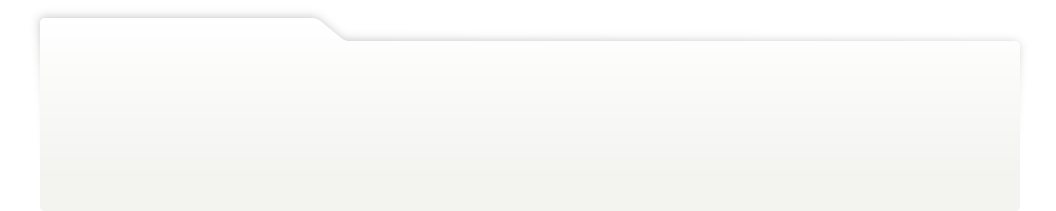
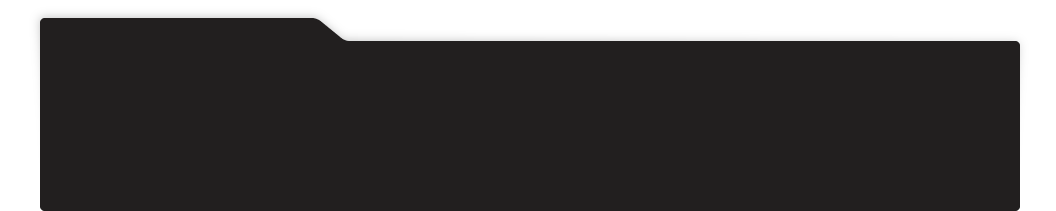
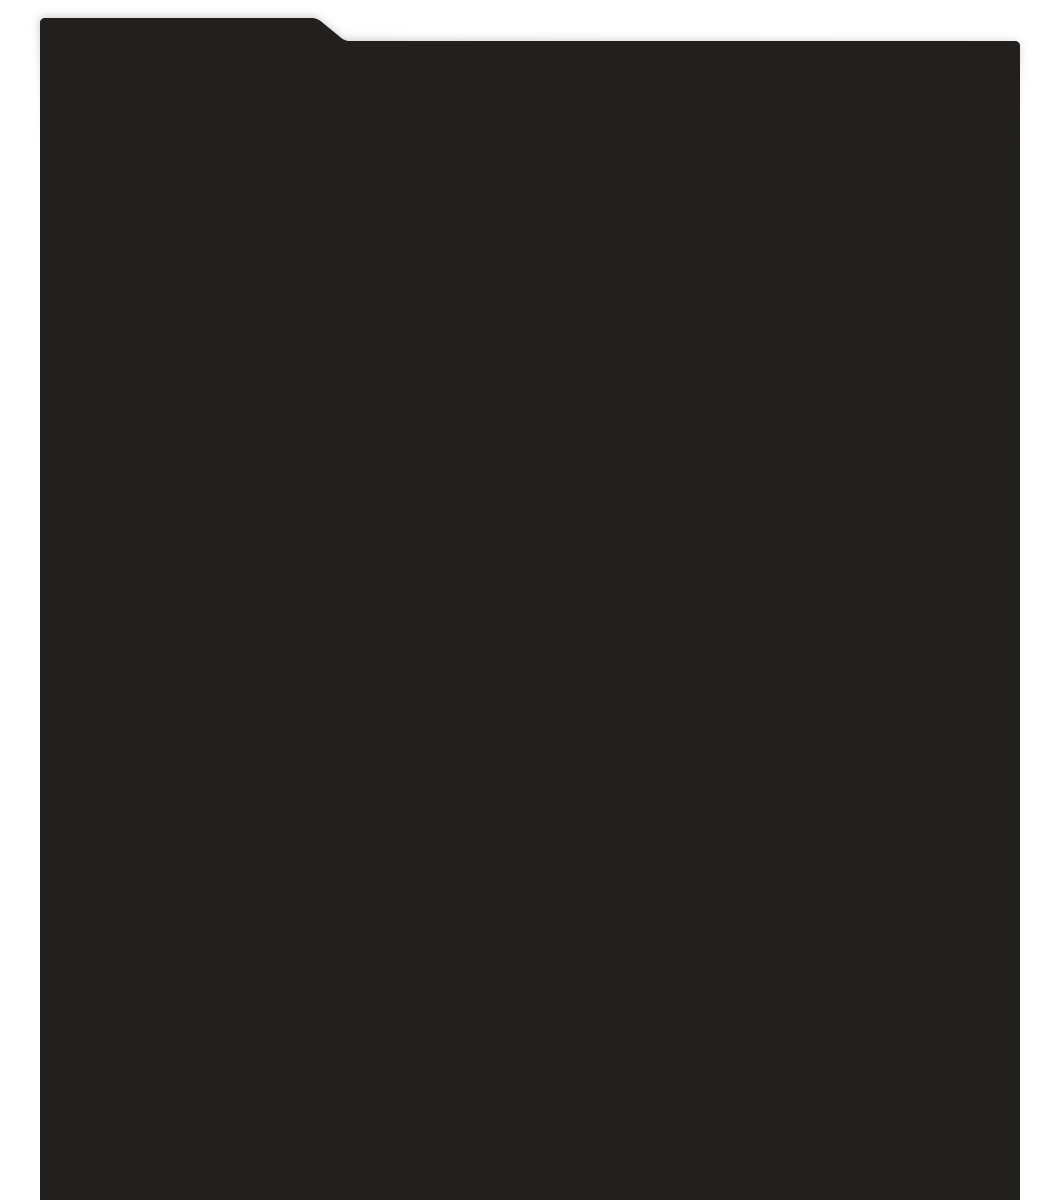
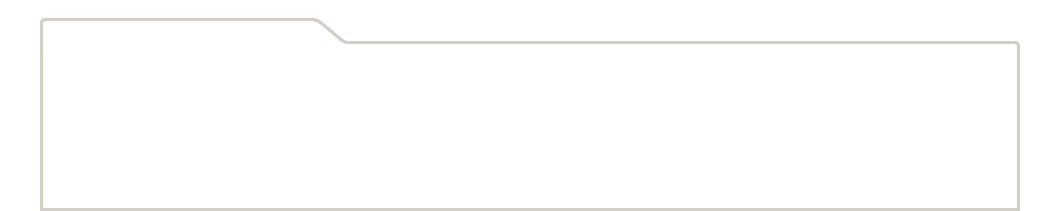
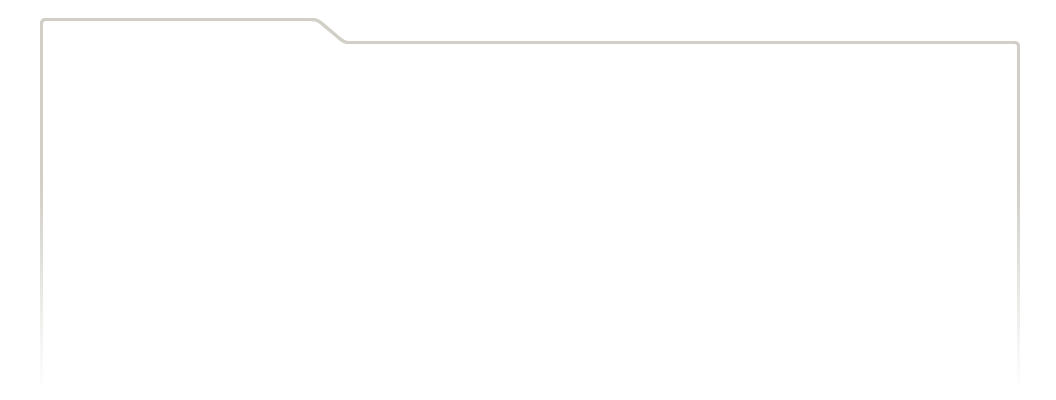
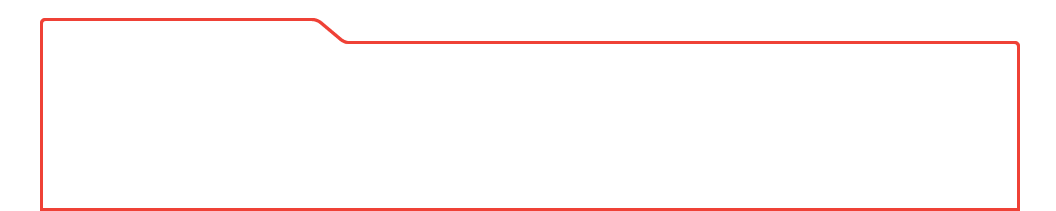
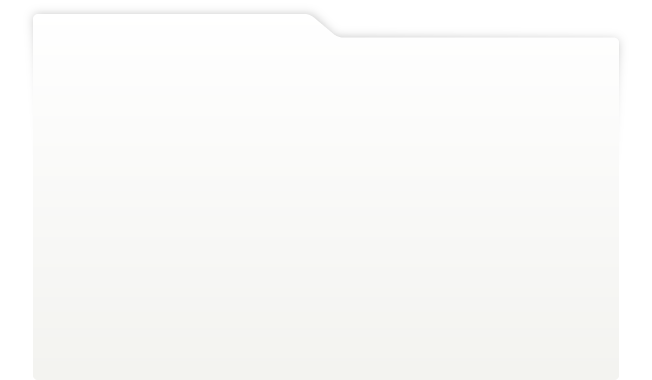
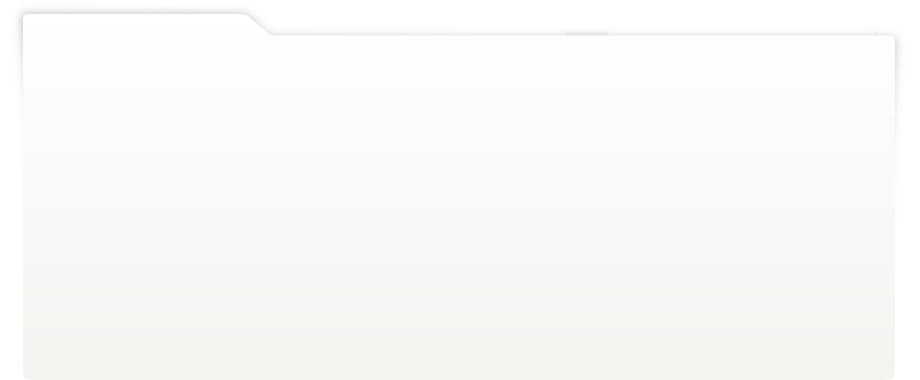
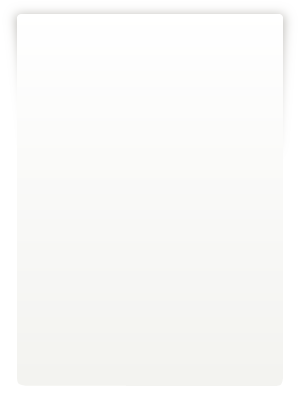
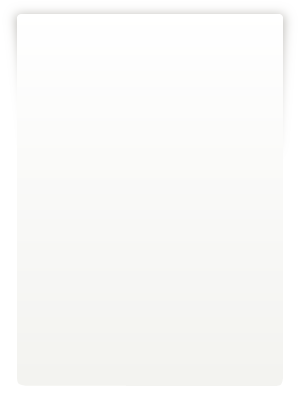
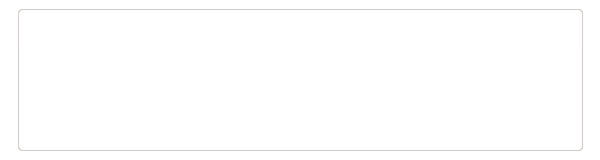
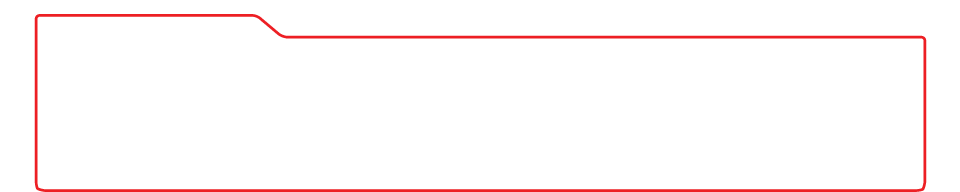
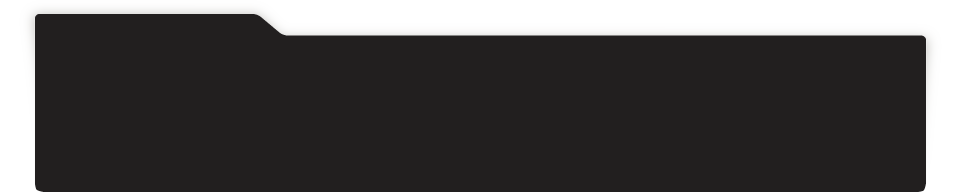
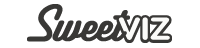
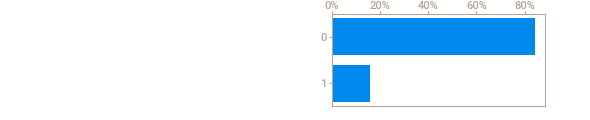
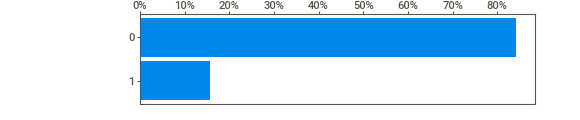
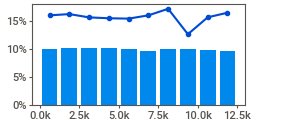
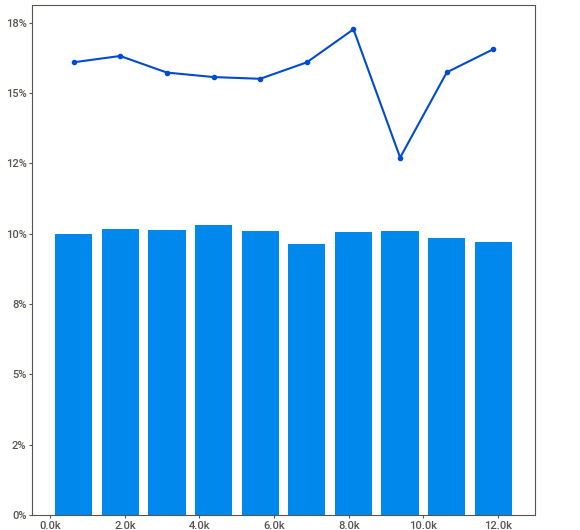
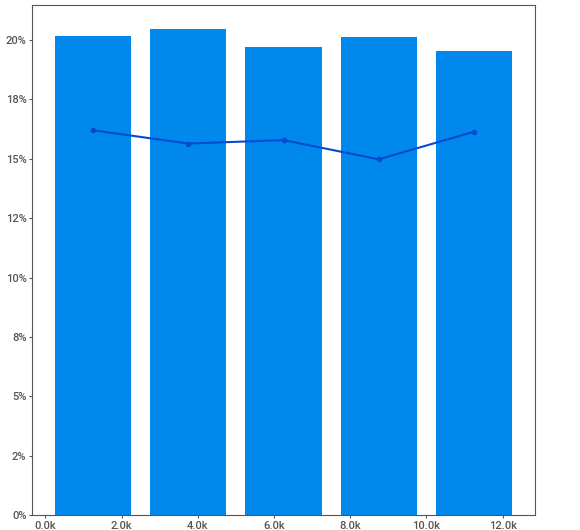
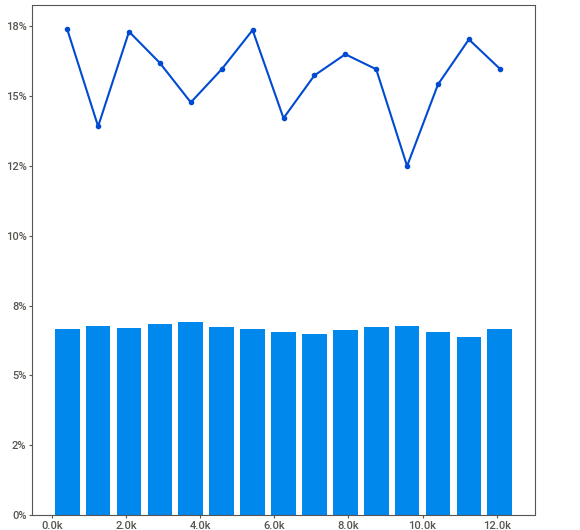
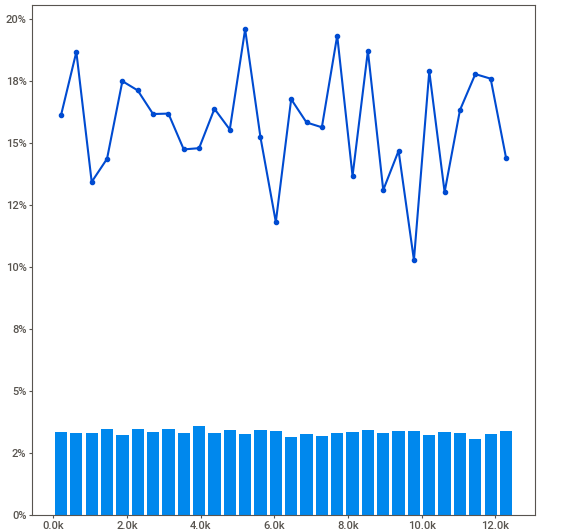
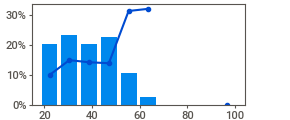
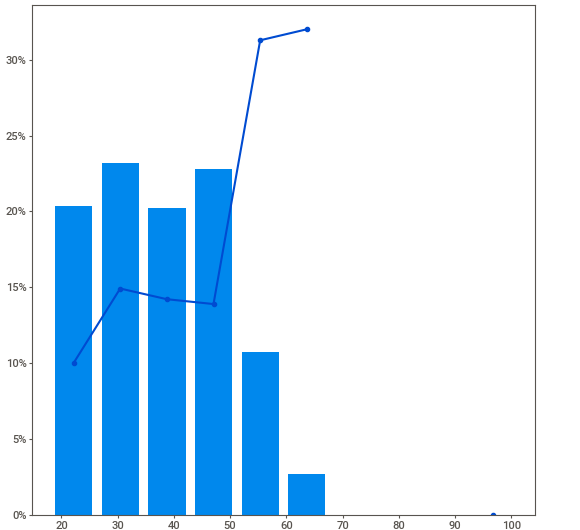
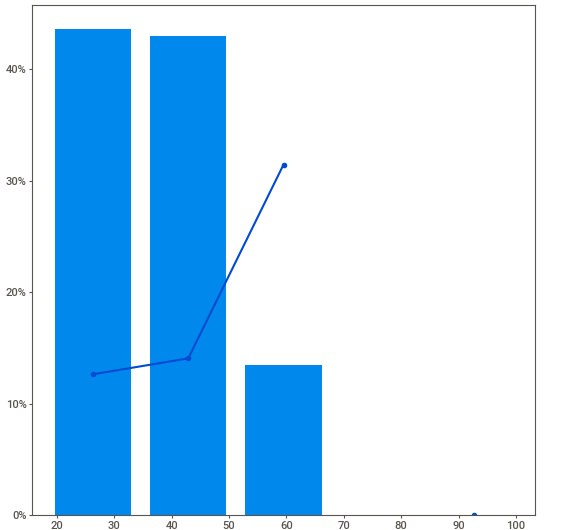
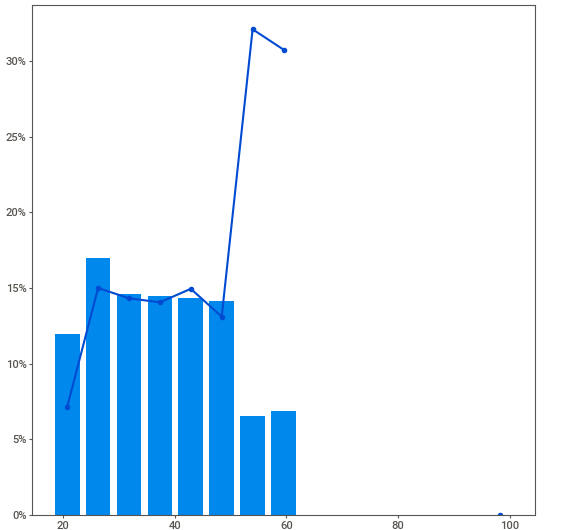
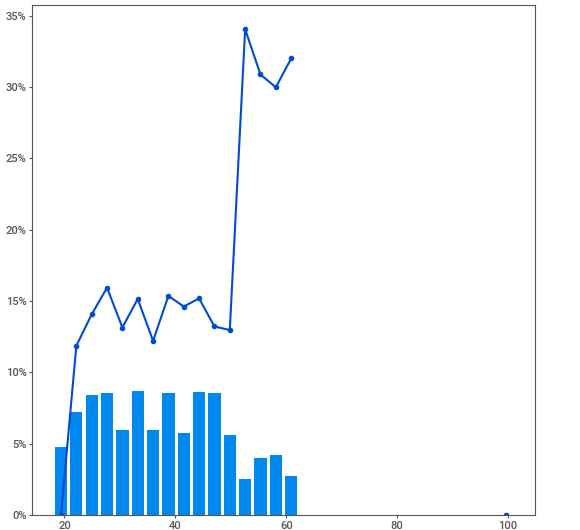
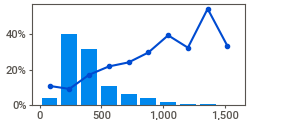
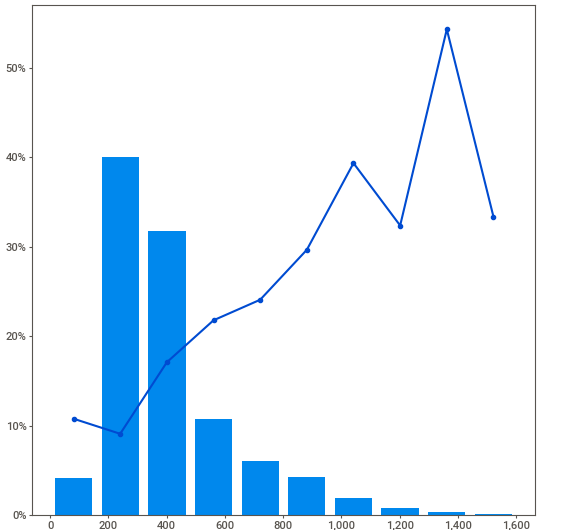
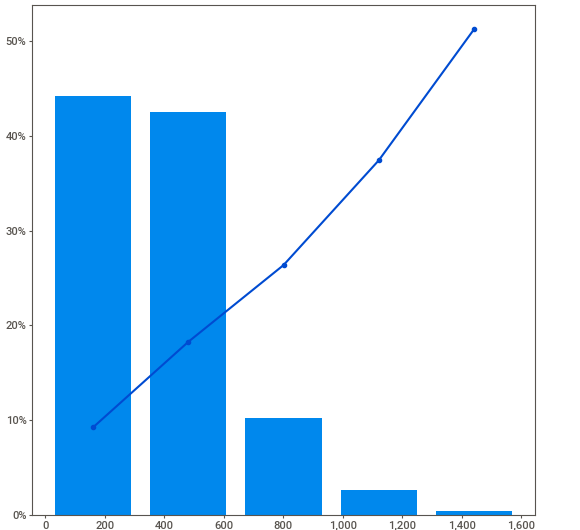
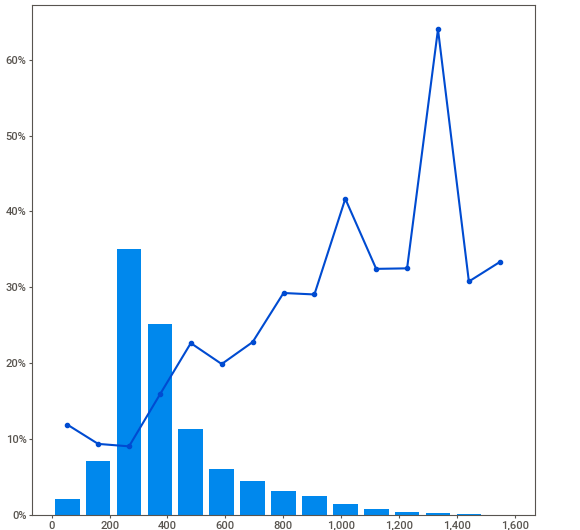
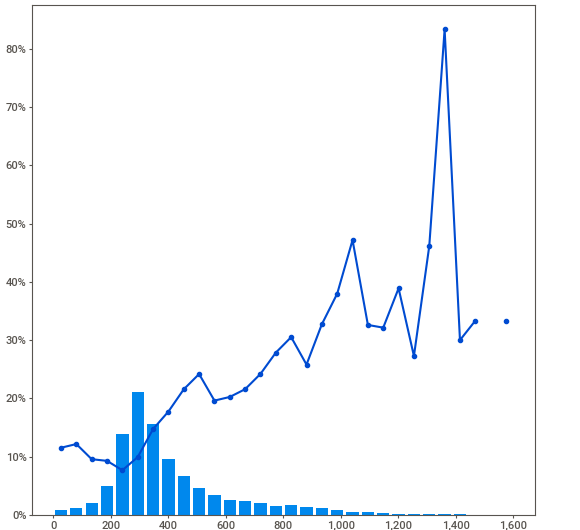
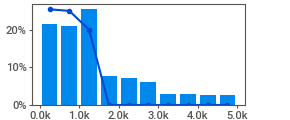
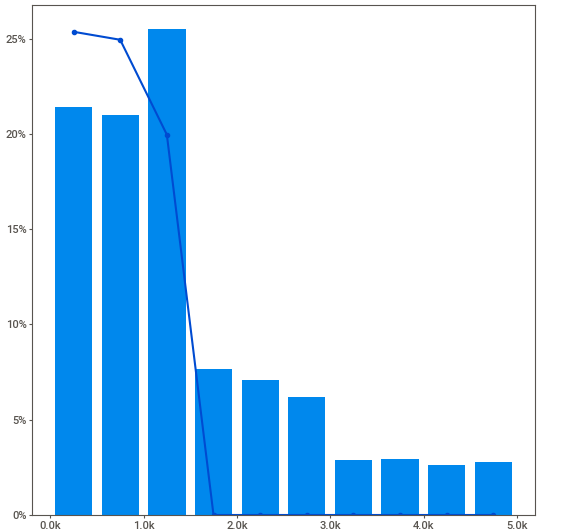
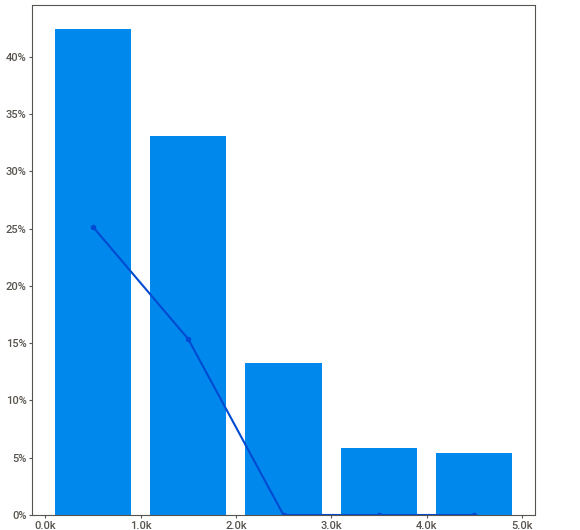
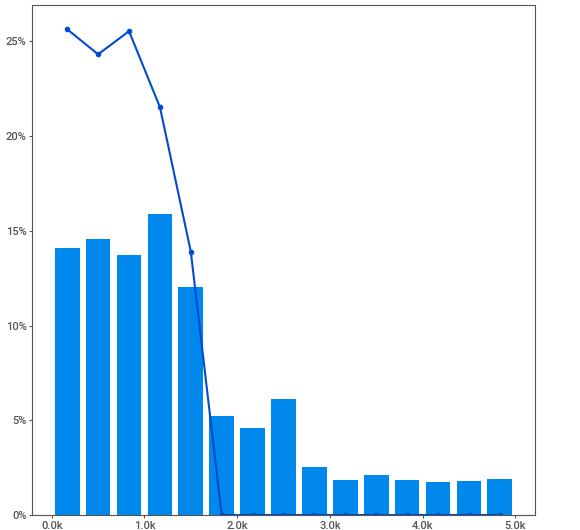
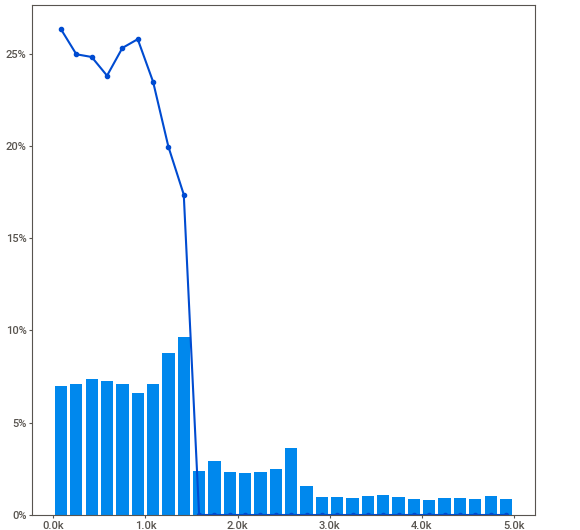
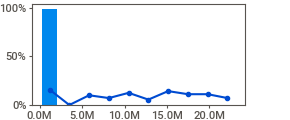
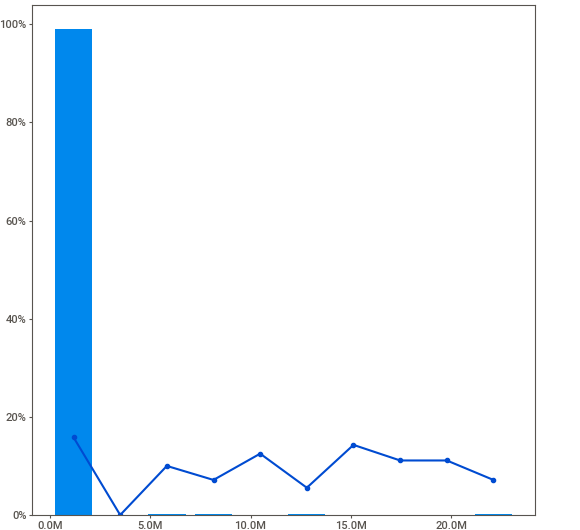
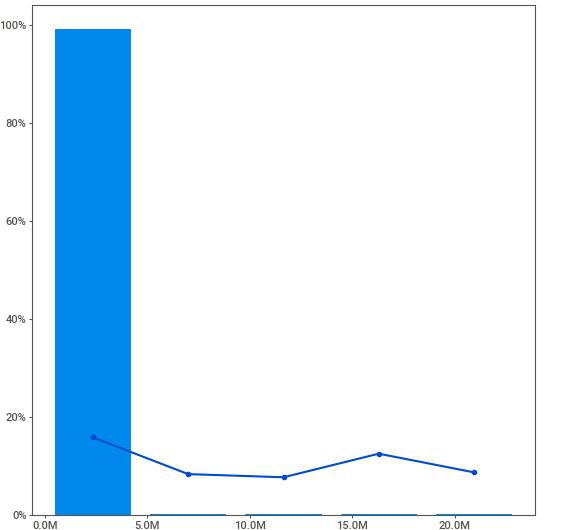
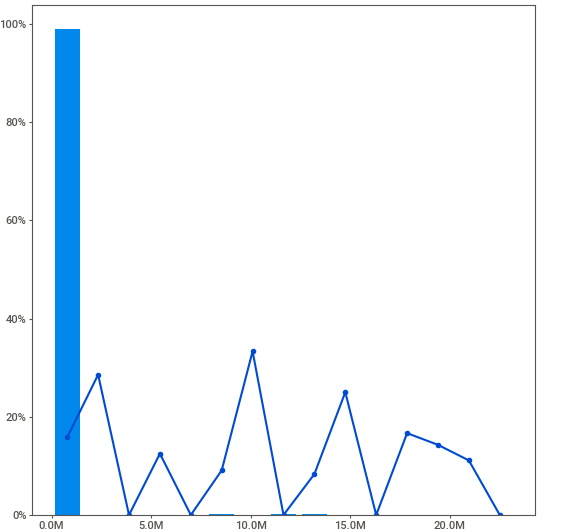
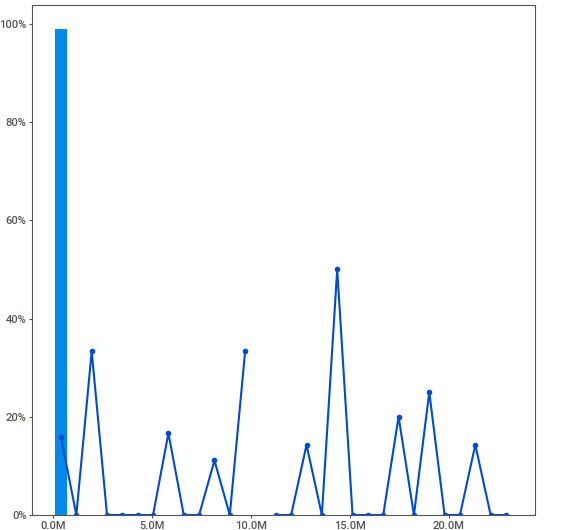
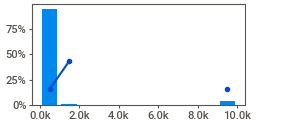
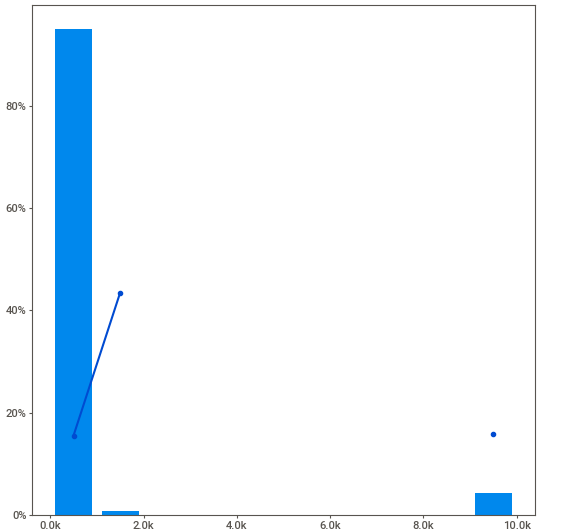
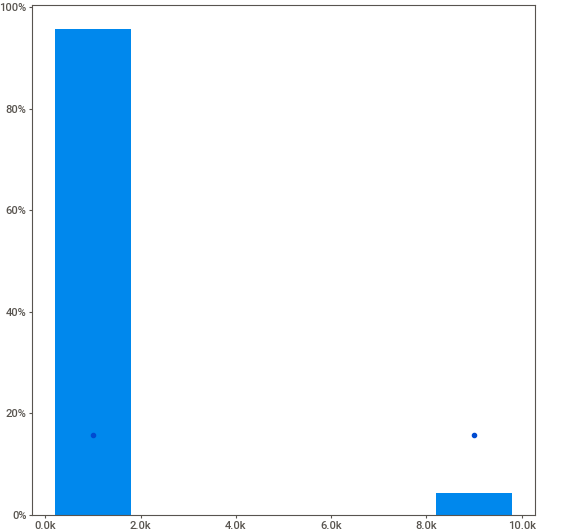
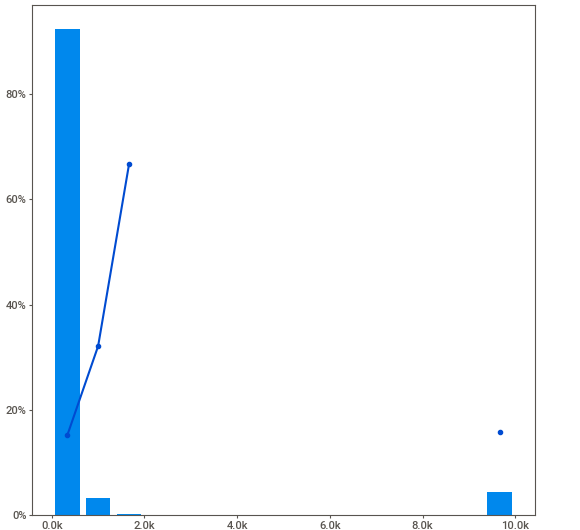
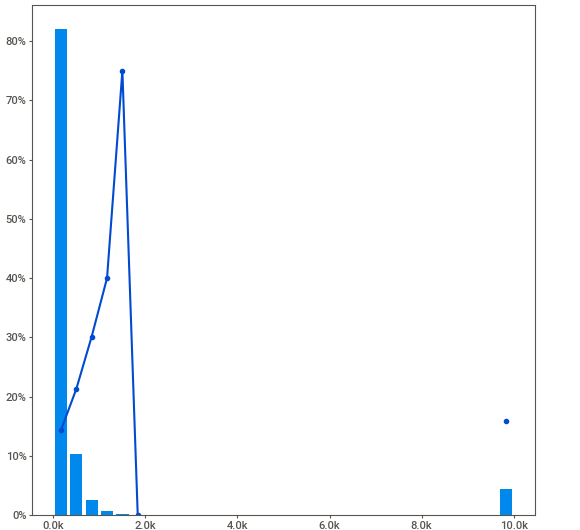
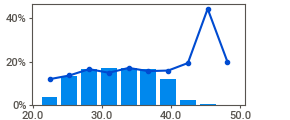
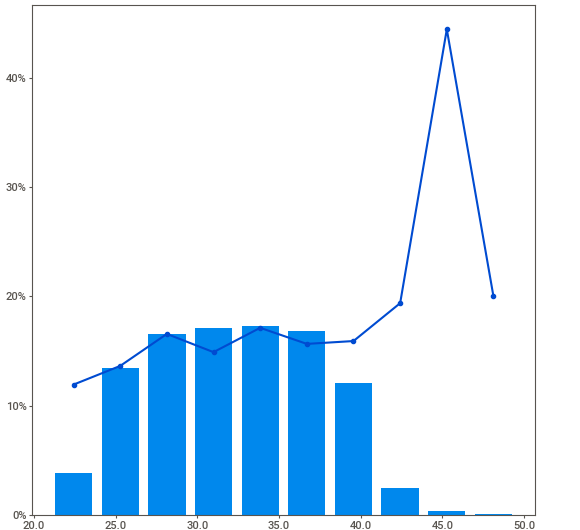
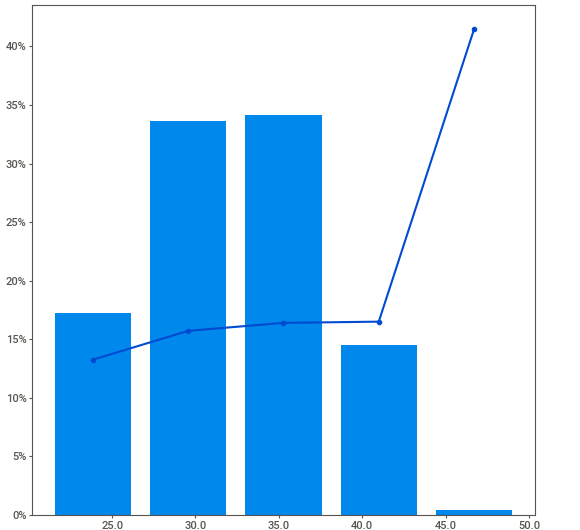
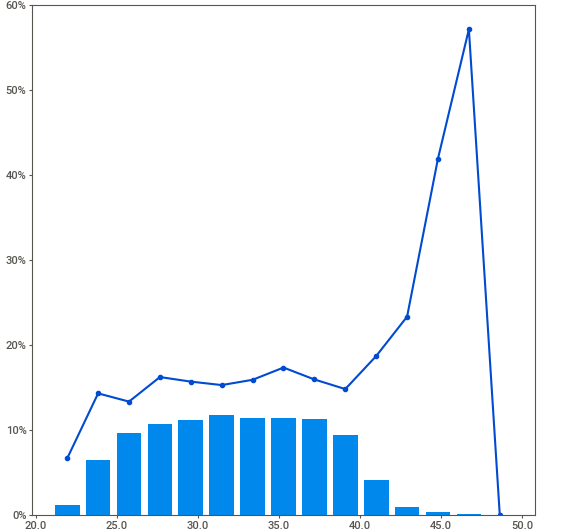
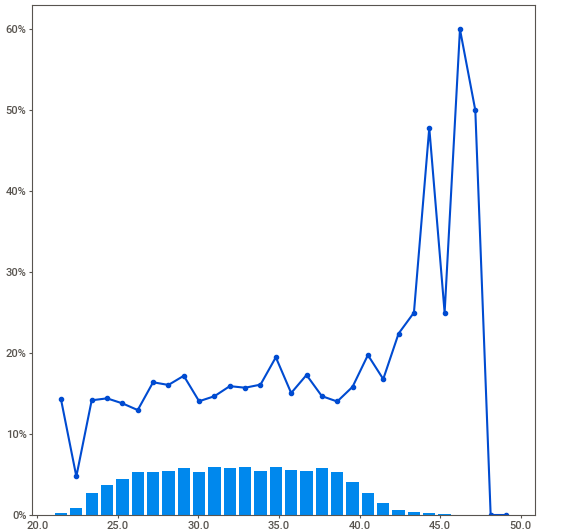
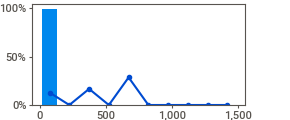
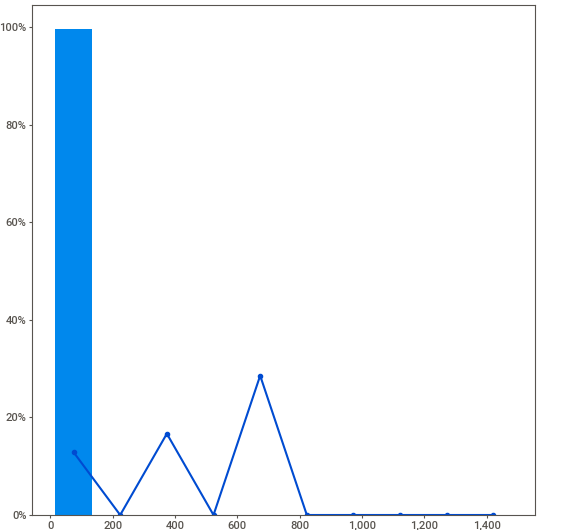
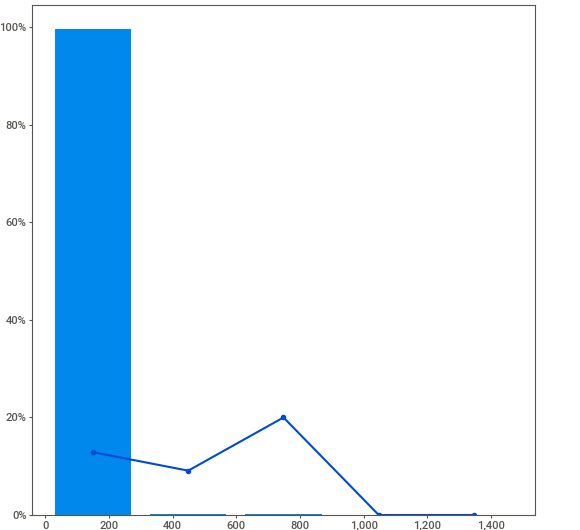
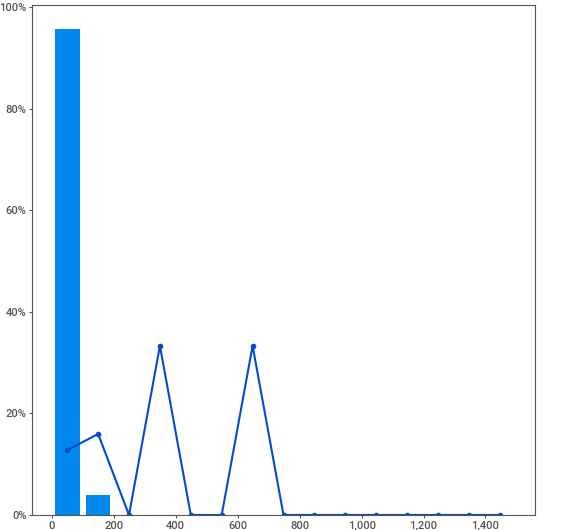
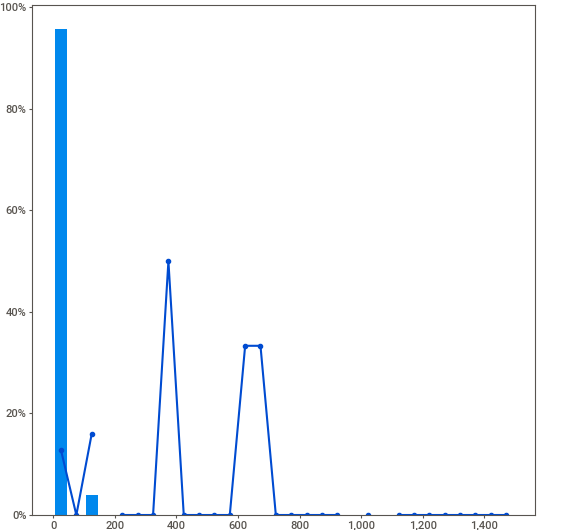
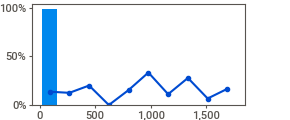
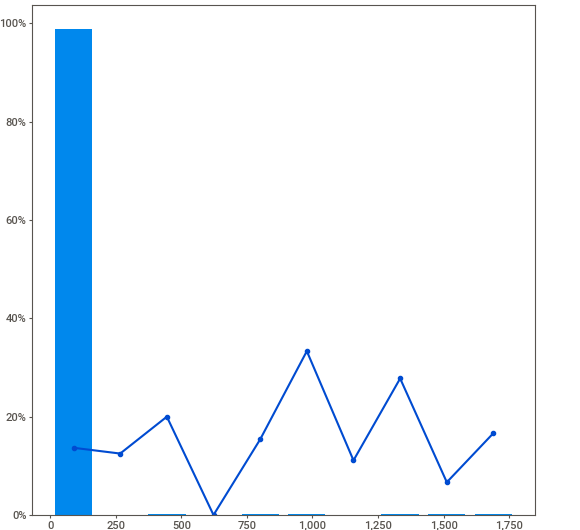
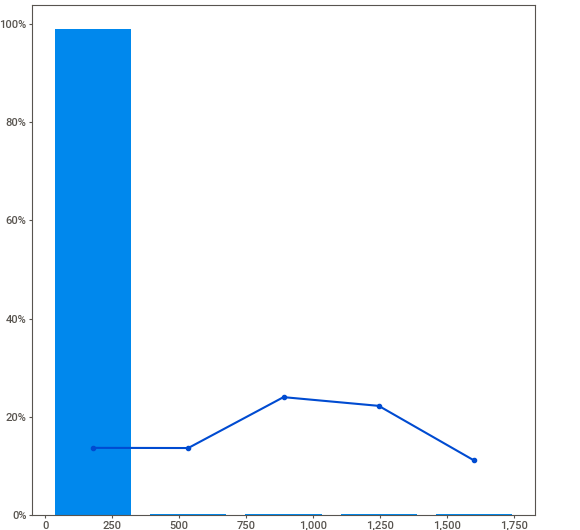
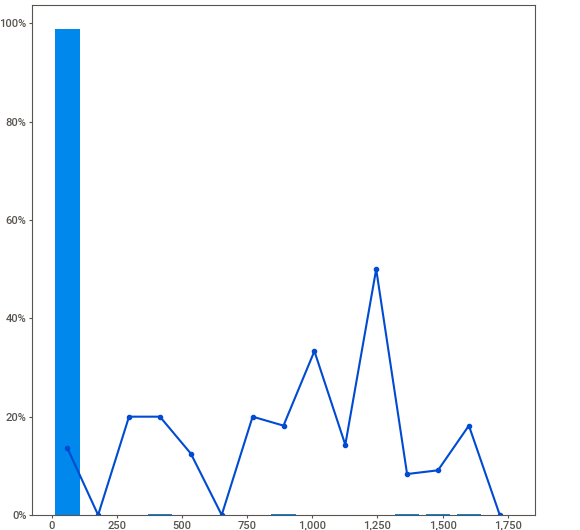
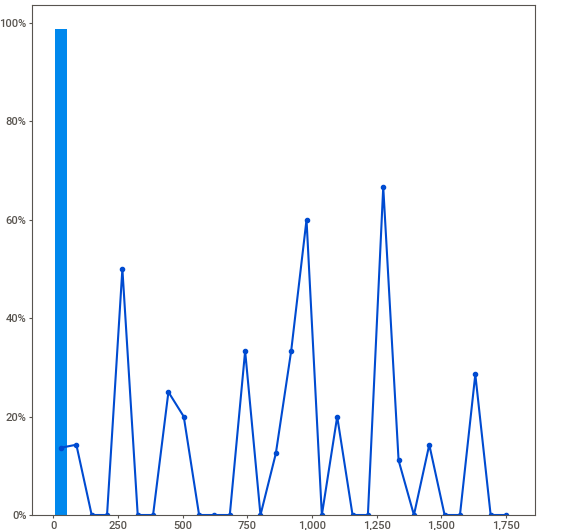
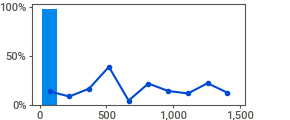
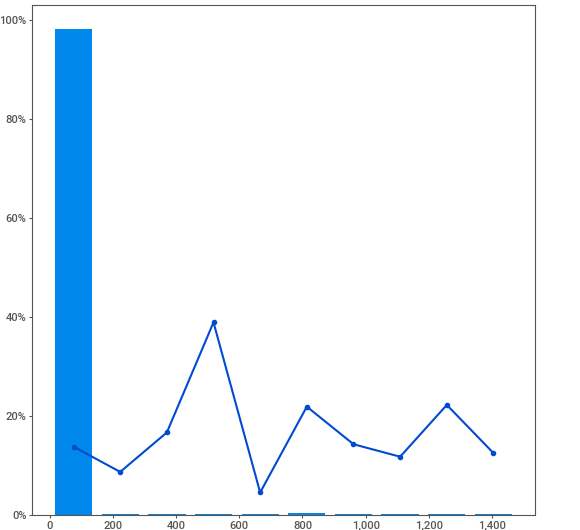
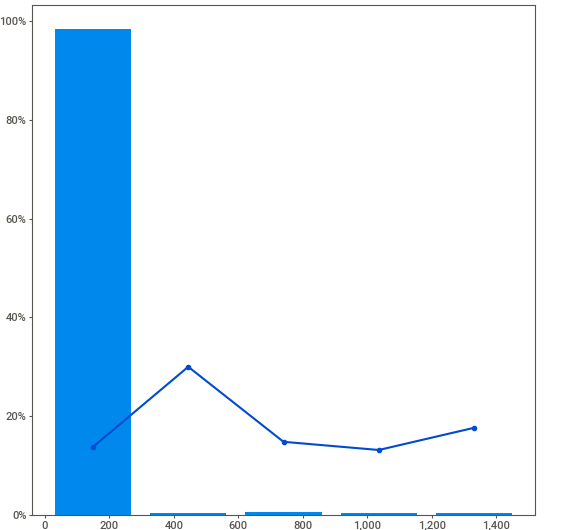
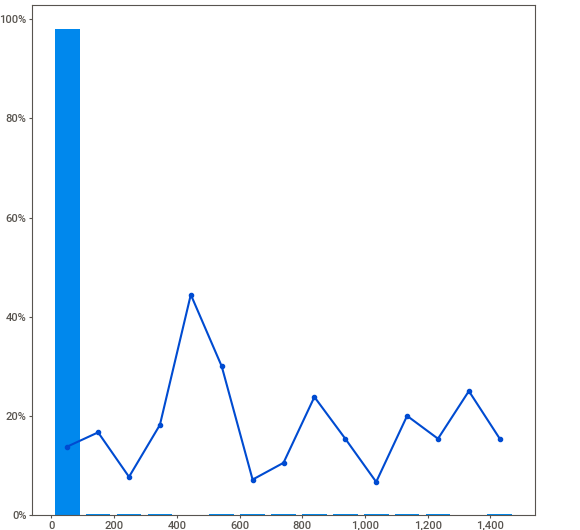
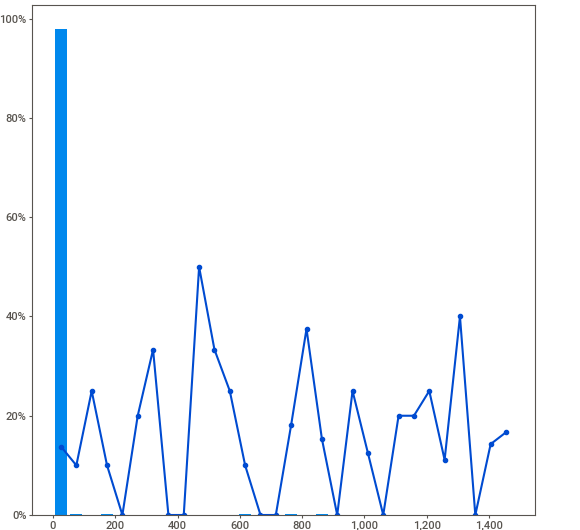
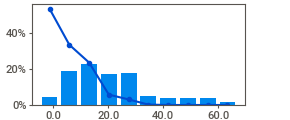
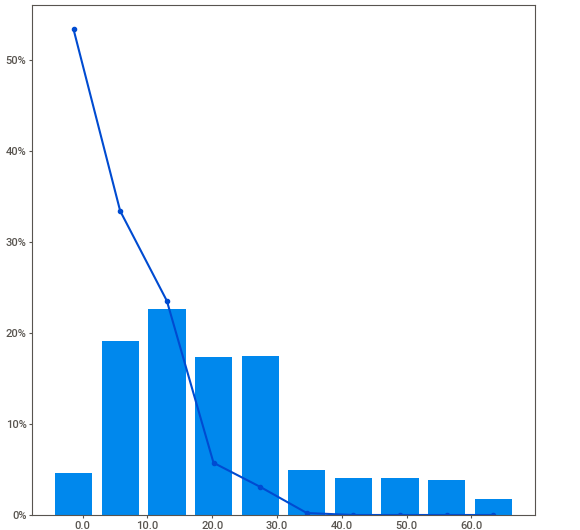
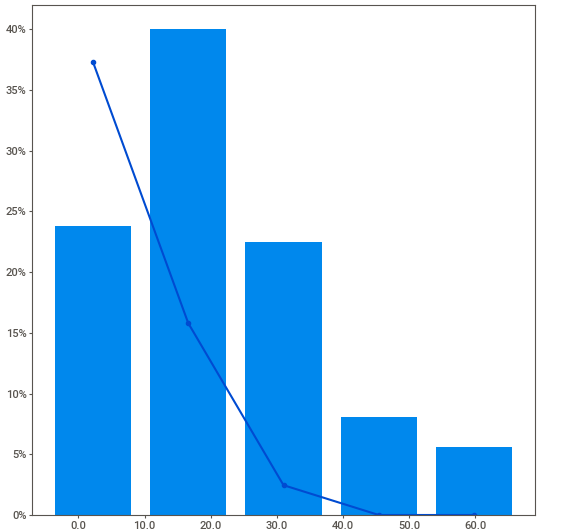
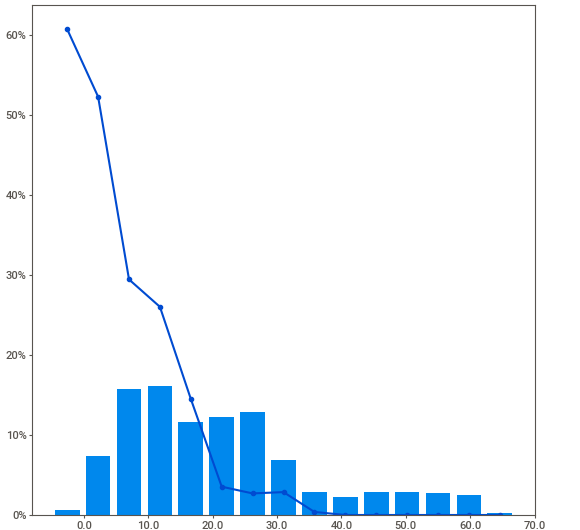
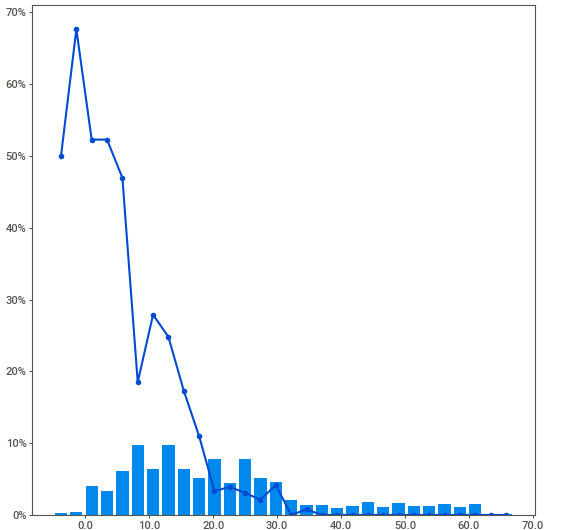
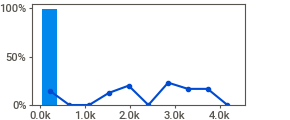
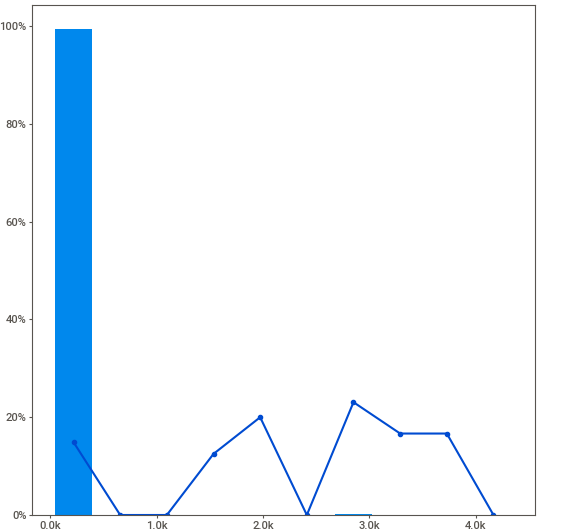
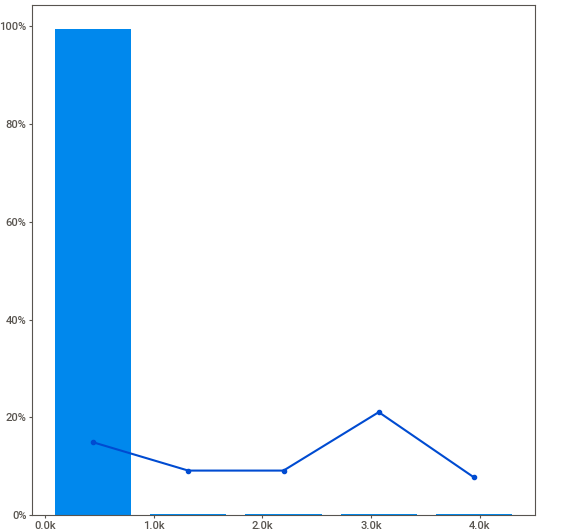
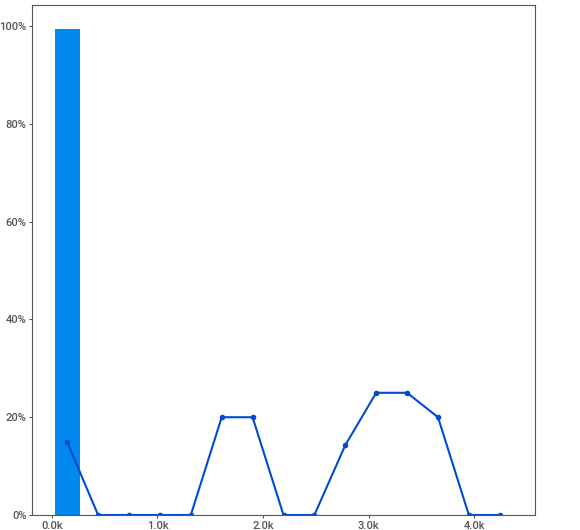
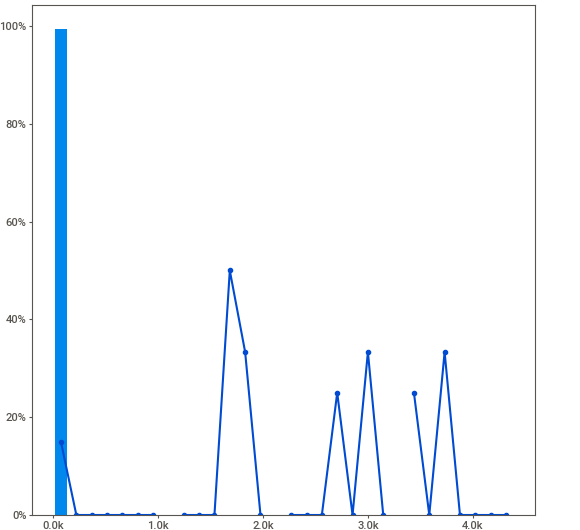
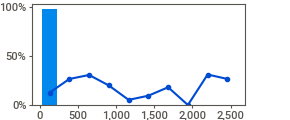
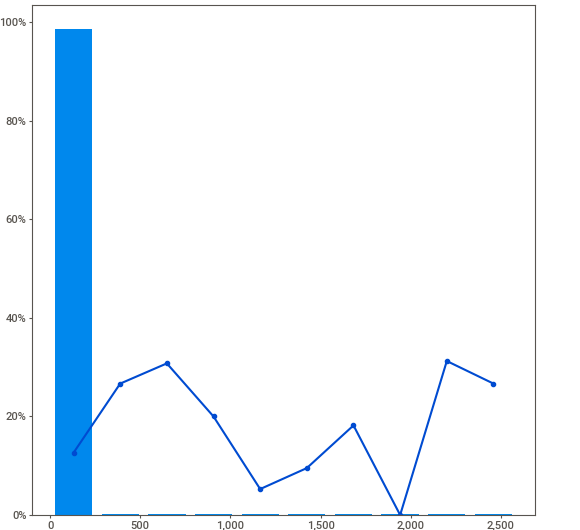
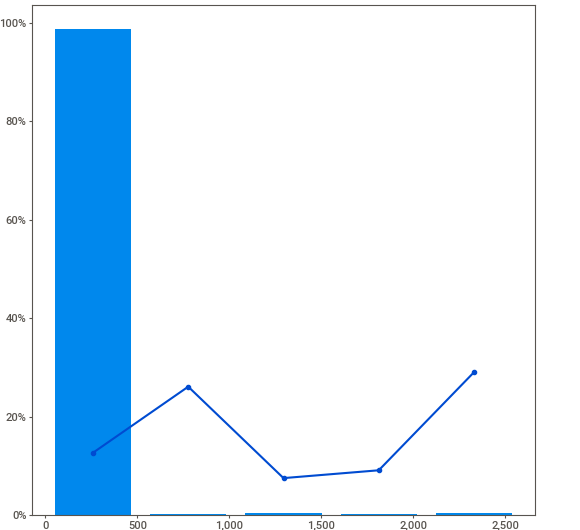
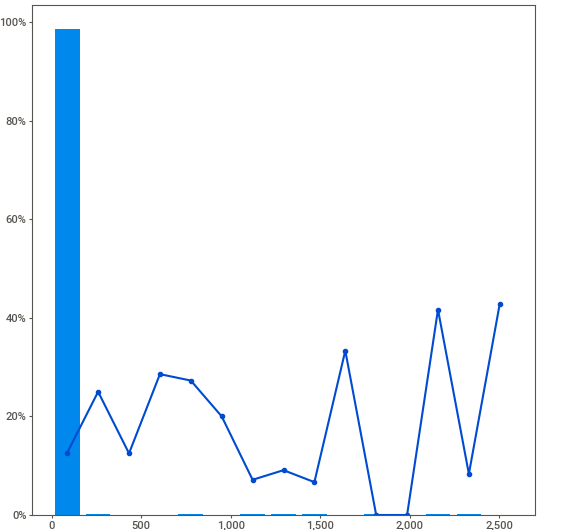
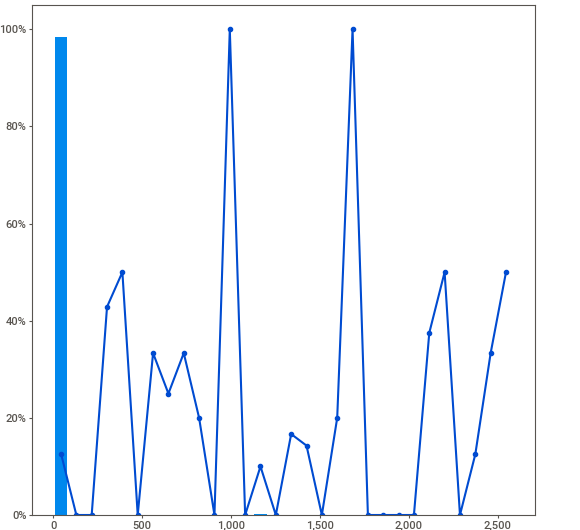
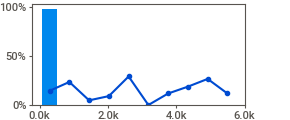
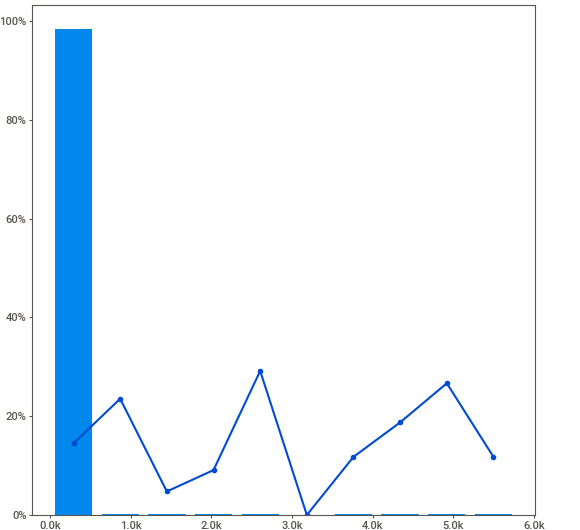
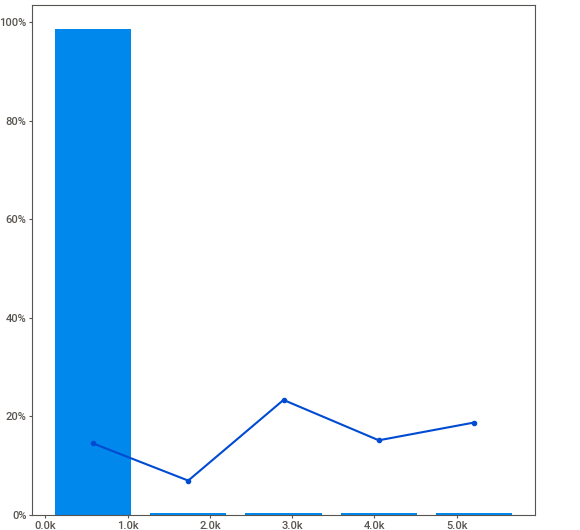
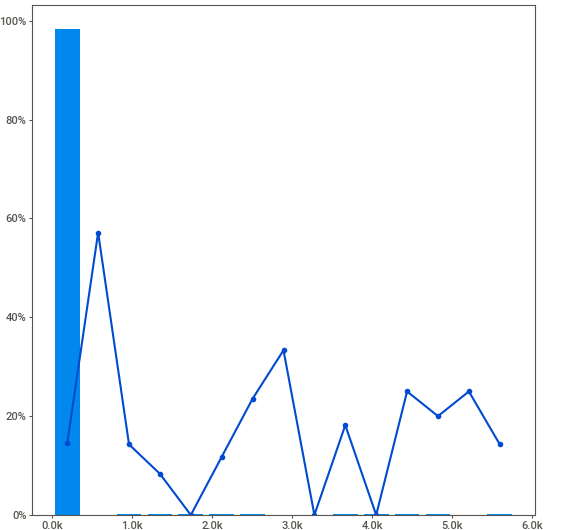
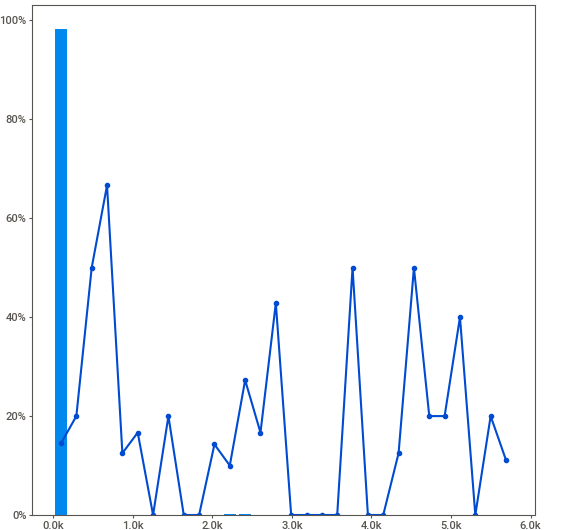
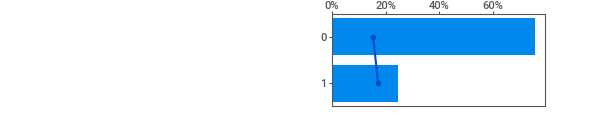
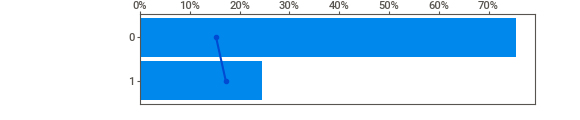
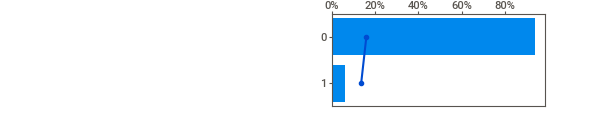
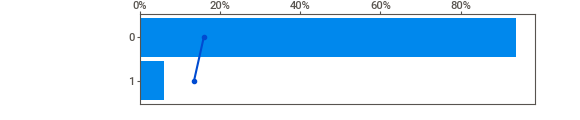
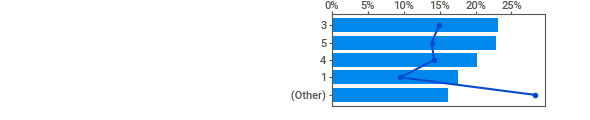
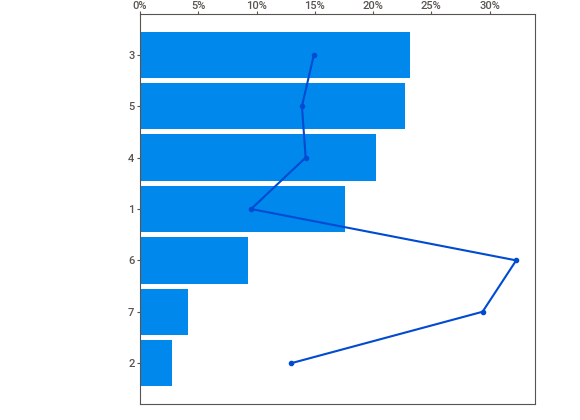
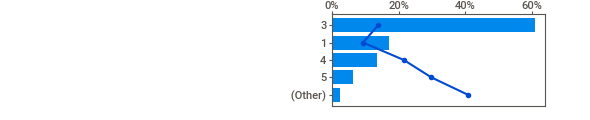
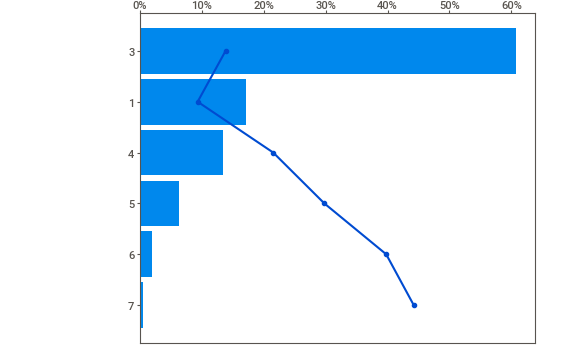
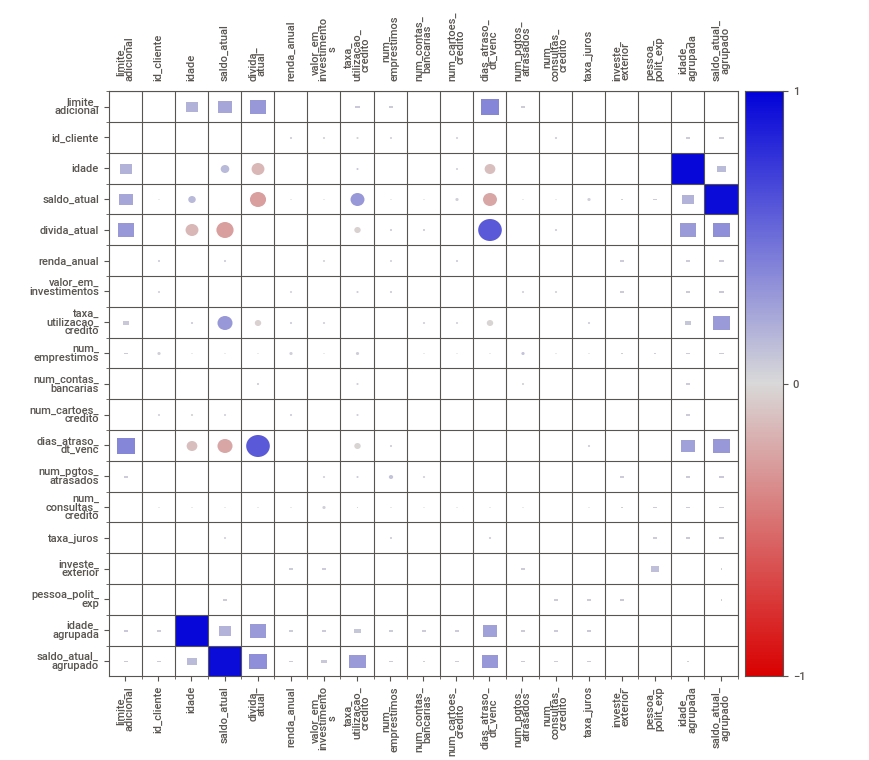
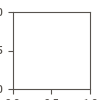

In [52]:
report = sv.analyze(df4, target_feat='limite_adicional')
report.show_html(filepath='cdshackdays3/SWEETVIZ_REPORT.html',open_browser=False)
# display on the nb
report.show_notebook(w=None, h=None,scale=None,layout='vertical');

# 5.0. Preparação dos Dados

In [1537]:
df5 = df3.copy()

In [1538]:
df5.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional', 'ind_end',
       'enfod', 'cartoes', 'ind_juros'],
      dtype='object')

## 5.1. Rescalling

In [1539]:
df5.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional', 'ind_end',
       'enfod', 'cartoes', 'ind_juros'],
      dtype='object')

In [1540]:
len(df5)

8897

In [1541]:
ss = pp.StandardScaler()
rs = pp.MinMaxScaler()

rs.fit(df5[['idade']])
df5['idade'] = rs.transform(df5[['idade']])

rs.fit(df5[['saldo_atual']])
df5['saldo_atual'] = rs.transform(df5[['saldo_atual']])

rs.fit(df5[['divida_atual']])
df5['divida_atual'] = rs.transform(df5[['divida_atual']])

rs.fit(df5[['renda_anual']])
df5['renda_anual'] = rs.transform(df5[['renda_anual']])

rs.fit(df5[['valor_em_investimentos']])
df5['valor_em_investimentos'] = rs.transform(df5[['valor_em_investimentos']])

rs.fit(df5[['taxa_utilizacao_credito']])
df5['taxa_utilizacao_credito'] = rs.transform(df5[['taxa_utilizacao_credito']])

rs.fit(df5[['num_emprestimos']])
df5['num_emprestimos'] = rs.transform(df5[['num_emprestimos']])

rs.fit(df5[['num_contas_bancarias']])
df5['num_contas_bancarias'] = rs.transform(df5[['num_contas_bancarias']])

rs.fit(df5[['num_cartoes_credito']])
df5['num_cartoes_credito'] = rs.transform(df5[['num_cartoes_credito']])

ss.fit(df5[['dias_atraso_dt_venc']])
df5['dias_atraso_dt_venc'] = ss.transform(df5[['dias_atraso_dt_venc']])

rs.fit(df5[['num_pgtos_atrasados']])
df5['num_pgtos_atrasados'] = rs.transform(df5[['num_pgtos_atrasados']])

rs.fit(df5[['num_consultas_credito']])
df5['num_consultas_credito'] = rs.transform(df5[['num_consultas_credito']])

rs.fit(df5[['taxa_juros']])
df5['taxa_juros'] = rs.transform(df5[['taxa_juros']])

rs.fit(df5[['ind_juros']])
df5['ind_juros'] = rs.transform(df5[['ind_juros']])

In [1542]:
# label Encoder
le = pp.LabelEncoder()

# Variavel preditora

df5['limite_adicional'] = df5['limite_adicional'].apply(lambda x: 0 if x == "Conceder" else 1)

# Investe exterior
df5['investe_exterior'] = df5['investe_exterior'].apply(lambda x: 0 if x == "Não" else 1)


# Pessoa politica exposta
df5['pessoa_polit_exp'] = df5['pessoa_polit_exp'].apply(lambda x: 0 if x == "Não" else 1)



In [1543]:
df5[df5['limite_adicional'] == 0].count()

id_cliente                 1399
idade                      1399
saldo_atual                1399
divida_atual               1399
renda_anual                1399
valor_em_investimentos     1399
taxa_utilizacao_credito    1399
num_emprestimos            1399
num_contas_bancarias       1399
num_cartoes_credito        1399
dias_atraso_dt_venc        1399
num_pgtos_atrasados        1399
num_consultas_credito      1399
taxa_juros                 1399
investe_exterior           1399
pessoa_polit_exp           1399
limite_adicional           1399
ind_end                    1399
enfod                      1399
cartoes                    1399
ind_juros                  1399
dtype: int64

In [1544]:
X =  df5.drop( columns=['id_cliente', 'limite_adicional'] )
y = df5['limite_adicional']

x_train, x_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=42 )

In [1545]:
print(f'X train shape: {x_train.shape}')
print(f'X test shape: {x_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (7117, 19)
X test shape: (1780, 19)
y train shape: (7117,)
y test shape: (1780,)


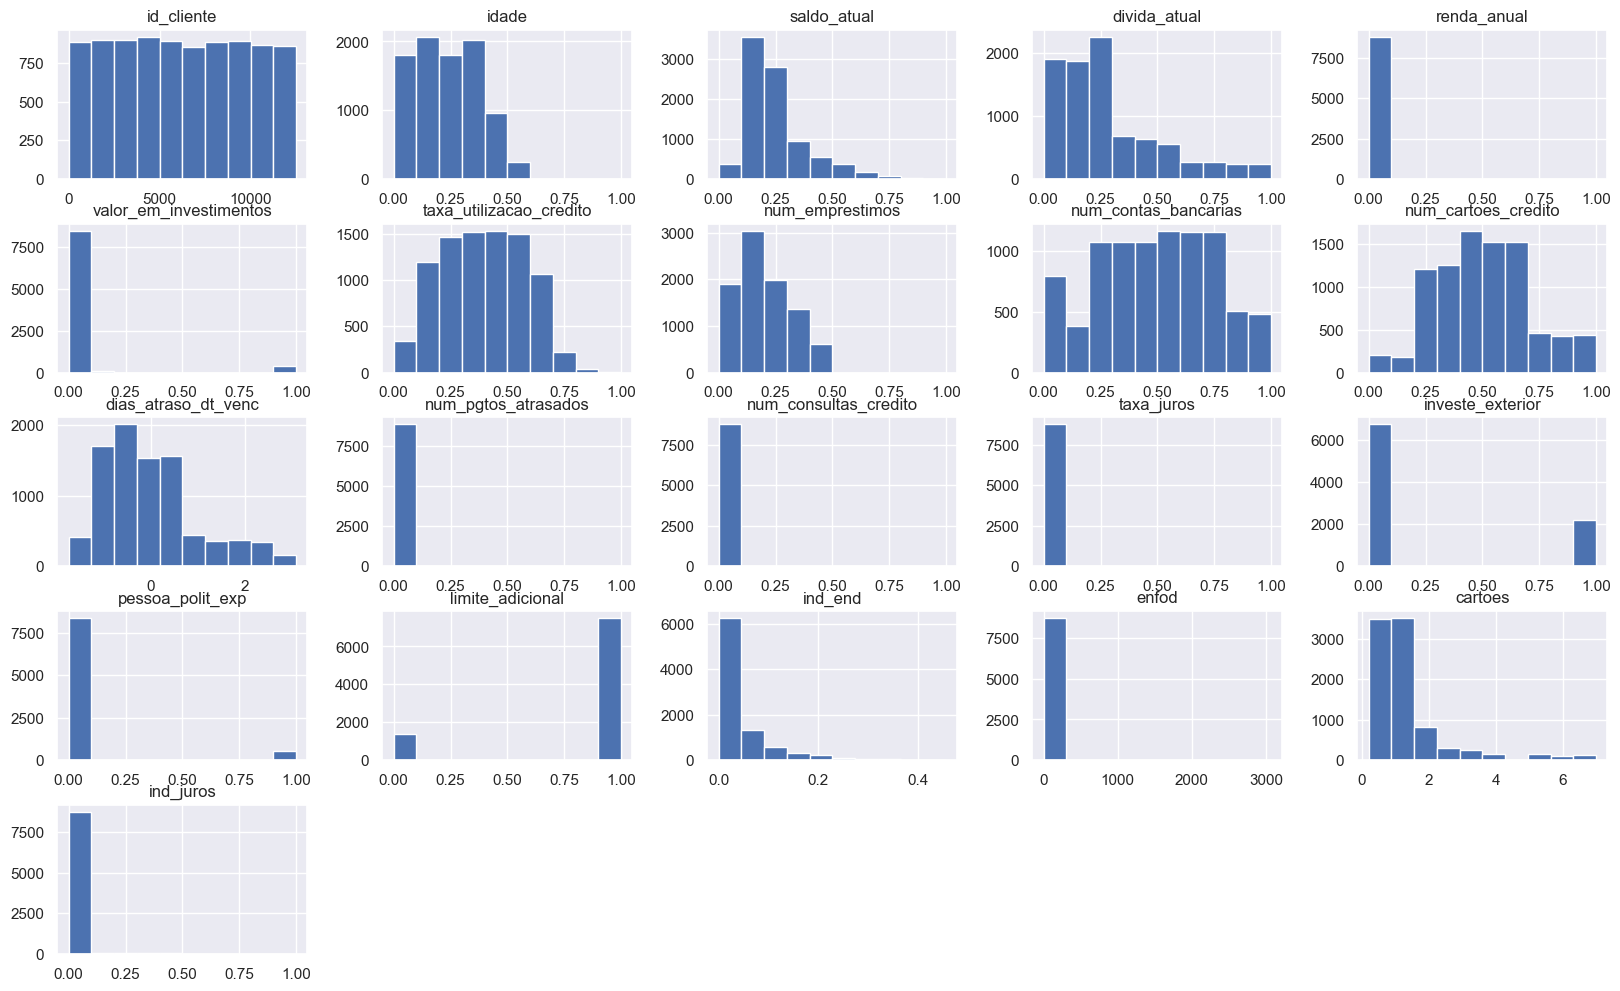

In [1546]:
df5.hist(figsize=(20, 12));

#saldo atual, dias atraso dt venc = log

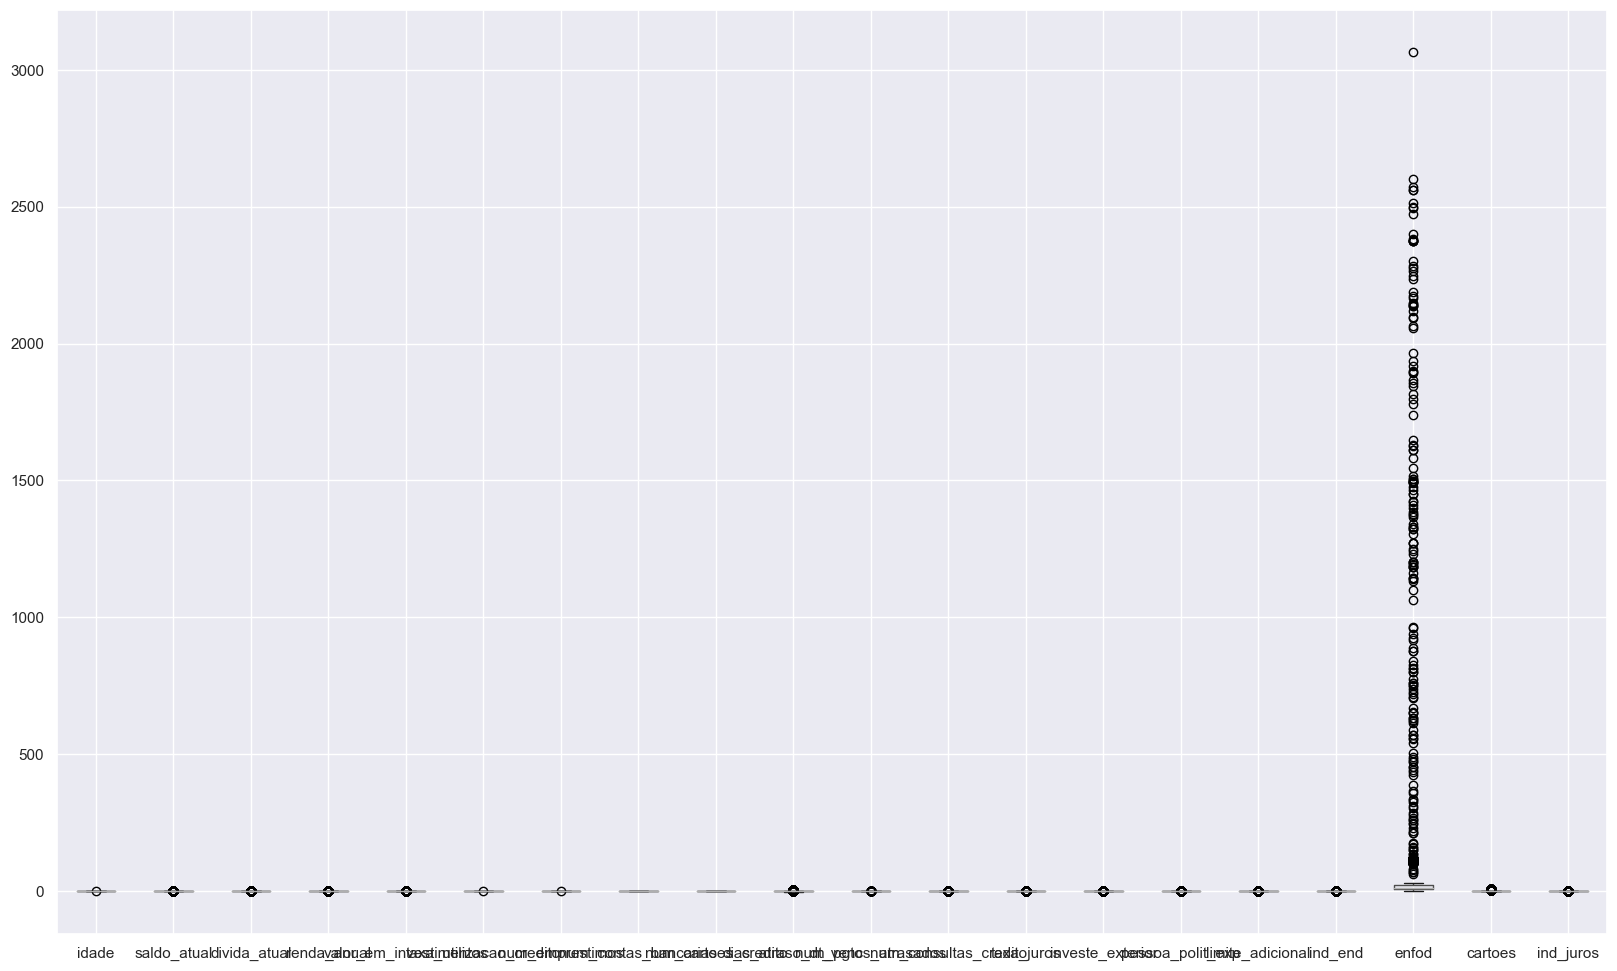

In [1547]:
df5.drop(columns=['id_cliente']).boxplot(figsize=(20, 12));

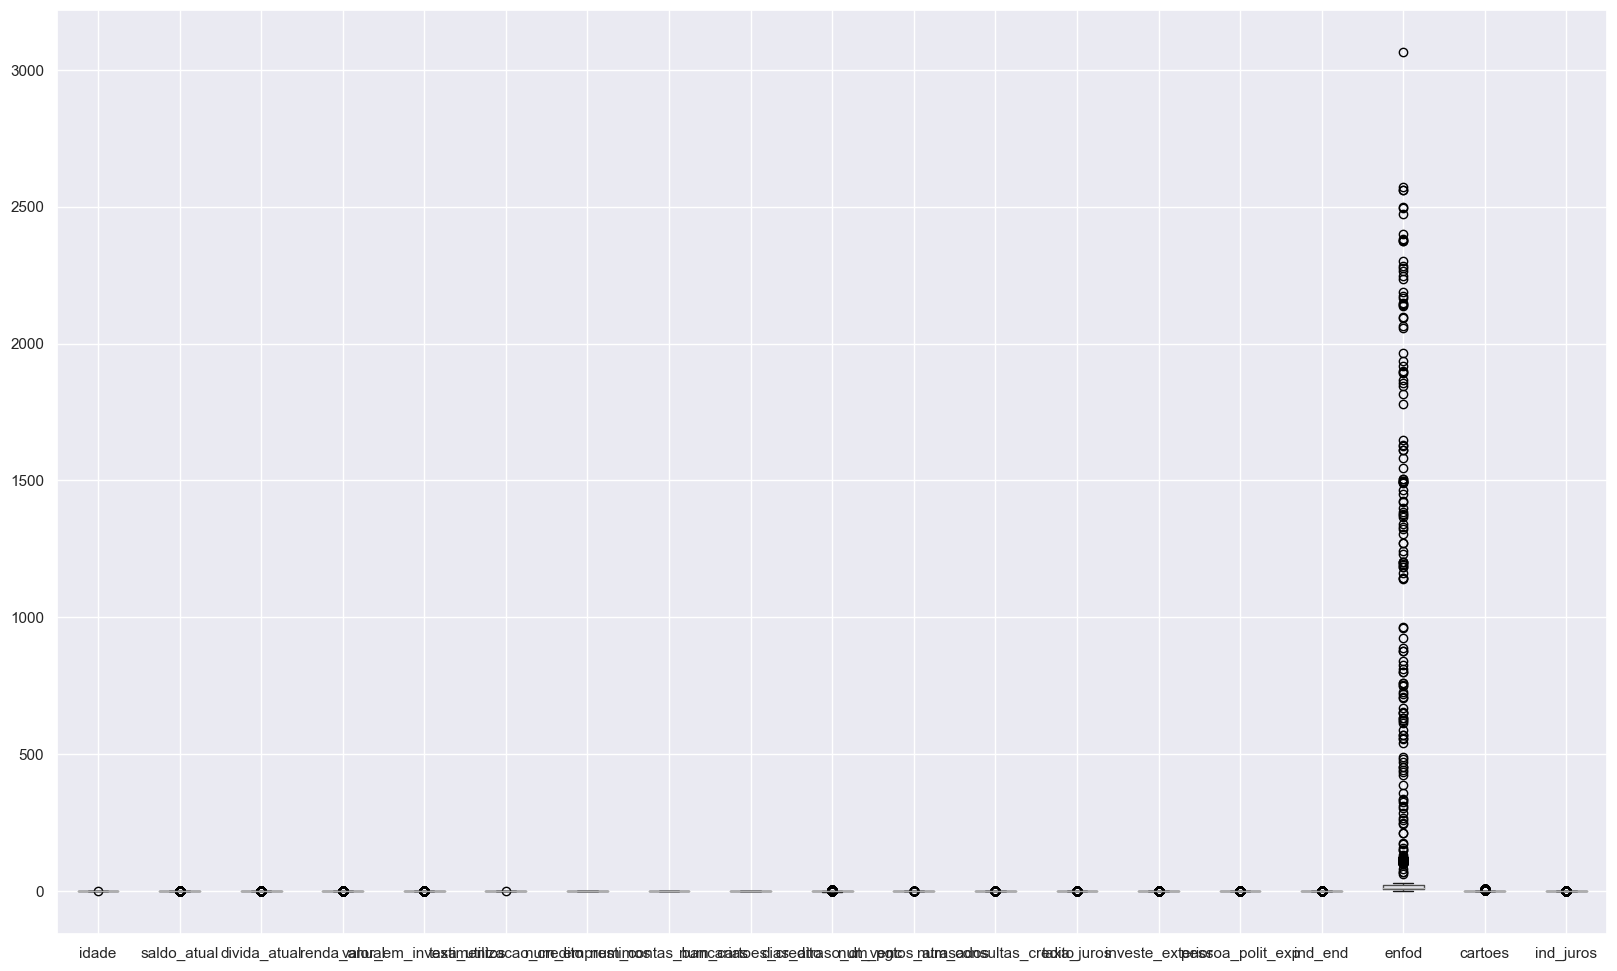

In [1548]:
x_train.boxplot(figsize=(20, 12));

# 6.0. Feature Selection

# 7.0. ML Modeling

In [1549]:
x_train.head()

,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,ind_end,enfod,cartoes,ind_juros
4816,0.072289,0.048031,0.012934,0.003620,0.013420,0.336982,0.210526,0.444444,0.222222,-0.743553,0.004558,0.001545,0.000864,0,0,0.000685,11,0.600000,0.000840
6414,0.265060,0.502956,0.213564,0.004012,0.013420,0.649400,0.105263,0.444444,0.666667,0.132327,0.003646,0.001545,0.001037,0,0,0.010282,13,1.400000,0.000784
4338,0.084337,0.209971,0.914751,0.001384,0.002737,0.302327,0.263158,0.888889,0.666667,1.210334,0.003646,0.003090,0.004493,0,0,0.107099,20,0.777778,0.003025
4033,0.048193,0.435564,0.264074,0.004299,0.018766,0.682930,0.157895,0.666667,0.222222,0.334454,0.001823,0.000772,0.000518,0,0,0.011945,8,0.428571,0.000224
8608,0.457831,0.491039,0.099759,0.003748,0.006361,0.581995,0.105263,0.333333,0.000000,-0.945679,0.000228,0.000772,0.000518,0,0,0.005106,5,0.250000,0.000028


In [1550]:
y_train.head()

4816    1
6414    1
4338    1
4033    1
8608    1
Name: limite_adicional, dtype: int64

In [1551]:
x_test.head()

,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,ind_end,enfod,cartoes,ind_juros
7931,0.144578,0.145884,0.177915,0.001392,0.023414,0.126337,0.157895,0.444444,0.555556,0.267078,0.002735,0.001159,0.001555,0,0,0.020747,12,1.200000,0.000840
6395,0.469880,0.318511,0.096954,0.004256,0.032072,0.422286,0.157895,0.666667,0.555556,0.536580,0.002279,0.001545,0.002592,0,0,0.004427,110,0.857143,0.001120
5734,0.349398,0.247979,0.807209,0.001956,0.007390,0.583708,0.263158,0.555556,0.666667,0.469204,0.003418,0.002317,0.004147,0,0,0.072057,18,1.166667,0.002626
8411,0.337349,0.142545,0.387251,0.000645,0.018177,0.513693,0.315789,0.888889,0.444444,1.277709,0.004558,0.004249,0.005357,0,0,0.075928,22,0.555556,0.004481
7286,0.433735,0.171626,0.259200,0.001403,0.027091,0.096151,0.052632,0.333333,0.666667,0.199703,0.001595,0.001545,0.002765,0,0,0.030040,12,1.750000,0.000833


In [1552]:
y_test.head()

7931    1
6395    1
5734    1
8411    1
7286    1
Name: limite_adicional, dtype: int64

## 7.1. Extra Trees

In [1553]:
et_model = en.ExtraTreesClassifier(random_state=42).fit(x_train, y_train)

y_hat = et_model.predict(x_test)

f1_score(y_test, y_hat)

0.9239235998705083

## 7.2. Random Forest

In [1554]:
rf_model = en.RandomForestClassifier(random_state=42).fit(x_train, y_train)

y_hat = rf_model.predict(x_test)

f1_score(y_test, y_hat)

0.9235793598954932

## 7.3. XGBoost

In [1555]:
xgb_model = xgb.XGBClassifier(random_state=42).fit(x_train, y_train)

y_hat = xgb_model.predict(x_test)

f1_score(y_test, y_hat)

0.9211481359287363

# 8.0. Hyper Parameter Fine Tunning

# 9.0. Test Data ( Validation )

In [1641]:
df_val_raw = pd.read_csv('/Users/thiago/Thiago/Data_Science/myrepos/hack03/cdshackdays3/test.csv', low_memory=False)

In [1642]:
df_val_raw.count()

id_cliente                 3000
idade                      3000
saldo_atual                3000
divida_atual               3000
renda_anual                3000
valor_em_investimentos     3000
taxa_utilizacao_credito    3000
num_emprestimos            3000
num_contas_bancarias       3000
num_cartoes_credito        3000
dias_atraso_dt_venc        3000
num_pgtos_atrasados        3000
num_consultas_credito      3000
taxa_juros                 3000
investe_exterior           3000
pessoa_polit_exp           3000
dtype: int64

In [1643]:
df_val_raw.isna().sum()

id_cliente                 0
idade                      0
saldo_atual                0
divida_atual               0
renda_anual                0
valor_em_investimentos     0
taxa_utilizacao_credito    0
num_emprestimos            0
num_contas_bancarias       0
num_cartoes_credito        0
dias_atraso_dt_venc        0
num_pgtos_atrasados        0
num_consultas_credito      0
taxa_juros                 0
investe_exterior           0
pessoa_polit_exp           0
dtype: int64

In [1644]:
# Adicionando novas variáveis

# Indice de Endividamento
df_val_raw['ind_end'] = df_val_raw['divida_atual'] / df_val_raw['renda_anual']

# Enfoderamento
df_val_raw['enfod'] = df_val_raw['num_cartoes_credito'] + df_val_raw['num_emprestimos'] + df_val_raw['num_consultas_credito']

# Relacao de Cartoes
df_val_raw['num_contas_bancarias'] = df_val_raw['num_contas_bancarias'].apply(lambda x: 1 if x < 1 else x )
df_val_raw['cartoes'] = df_val_raw['num_cartoes_credito'] / df_val_raw['num_contas_bancarias']

# Indice de Juros
df_val_raw['ind_juros'] = df_val_raw['taxa_juros'] * df_val_raw['num_pgtos_atrasados']


In [1645]:
df_val = df_val_raw.drop(columns=['id_cliente']).copy()

In [1646]:
# Filtragem de linhas - Idade

idade_median = df_val['idade'].median()
df_val['idade'] = df_val['idade'].apply(lambda x: idade_median if x >= 102 else x)


# Filtragem de linhas - Numero de emprestimos
num_empr_median = df_val['num_emprestimos'].median()
df_val['num_emprestimos'] = df_val['num_emprestimos'].apply(lambda x: num_empr_median if x >= 30 else x) #best

# Filtragem de linhas - Numero de contas bancarias
num_conta_median = df_val['num_contas_bancarias'].median()
df_val['num_contas_bancarias'] = df_val['num_contas_bancarias'].apply(lambda x: num_conta_median if x >= 11 else x) #best

# Filtragem de linhas - Numero de cartoes                #Boa opção
num_cartao_median = df_val['num_cartoes_credito'].median()
df_val['num_cartoes_credito'] = df_val['num_cartoes_credito'].apply(lambda x: num_cartao_median if x >= 11 else x) #best

In [1647]:
rs = pp.MinMaxScaler()
ss = pp.StandardScaler()

rs.fit(df_val[['idade']])
df_val['idade'] = rs.transform(df_val[['idade']])

ss.fit(df_val[['saldo_atual']])
df_val['saldo_atual'] = ss.transform(df_val[['saldo_atual']])

rs.fit(df_val[['divida_atual']])
df_val['divida_atual'] = rs.transform(df_val[['divida_atual']])

rs.fit(df_val[['renda_anual']])
df_val['renda_anual'] = rs.transform(df_val[['renda_anual']])

rs.fit(df_val[['valor_em_investimentos']])
df_val['valor_em_investimentos'] = rs.transform(df_val[['valor_em_investimentos']])

rs.fit(df_val[['taxa_utilizacao_credito']])
df_val['taxa_utilizacao_credito'] = rs.transform(df_val[['taxa_utilizacao_credito']])

rs.fit(df_val[['num_emprestimos']])
df_val['num_emprestimos'] = rs.transform(df_val[['num_emprestimos']])

rs.fit(df_val[['num_contas_bancarias']])
df_val['num_contas_bancarias'] = rs.transform(df_val[['num_contas_bancarias']])

rs.fit(df_val[['num_cartoes_credito']])
df_val['num_cartoes_credito'] = rs.transform(df_val[['num_cartoes_credito']])

ss.fit(df_val[['dias_atraso_dt_venc']])
df_val['dias_atraso_dt_venc'] = ss.transform(df_val[['dias_atraso_dt_venc']])

rs.fit(df_val[['num_pgtos_atrasados']])
df_val['num_pgtos_atrasados'] = rs.transform(df_val[['num_pgtos_atrasados']])

rs.fit(df_val[['num_consultas_credito']])
df_val['num_consultas_credito'] = rs.transform(df_val[['num_consultas_credito']])

rs.fit(df_val[['taxa_juros']])
df_val['taxa_juros'] = rs.transform(df_val[['taxa_juros']])

rs.fit(df_val[['ind_juros']])
df_val['ind_juros'] = rs.transform(df_val[['ind_juros']])

# Investe exterior
df_val['investe_exterior'] = df_val['investe_exterior'].apply(lambda x: 0 if x == "Não" else 1)

# Pessoa politica exposta
df_val['pessoa_polit_exp'] = df_val['pessoa_polit_exp'].apply(lambda x: 0 if x == "Não" else 1)

In [1648]:
df_val.head()

,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,ind_end,enfod,cartoes,ind_juros
0,0.325581,0.296959,0.120983,0.001390,0.010429,0.102426,0.111111,0.111111,0.333333,-1.212709,0.000967,0.000772,0.000875,0,0,0.014173,7,2.000000,0.000224
1,0.162791,-0.549535,0.188870,0.001427,0.027673,0.675275,0.000000,0.666667,0.444444,-1.079773,0.003386,0.001543,0.000700,0,0,0.021675,9,0.714286,0.000653
2,0.395349,1.549862,0.109596,0.003097,0.009867,0.681436,0.000000,0.333333,0.444444,-0.614497,0.002418,0.000772,0.001224,0,0,0.006668,1290,322.000000,0.000746
3,0.465116,-0.504968,0.341207,0.001350,0.016244,0.101829,0.333333,0.777778,0.666667,0.581927,0.002660,0.001929,0.002449,0,0,0.040819,15,0.875000,0.001538
4,0.720930,-0.303381,0.084197,0.001377,0.015435,0.291286,0.222222,0.000000,0.444444,-1.146241,0.000000,0.000772,0.001924,0,0,0.009944,9,5.000000,0.000000


In [1649]:
df_val.head()

,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,ind_end,enfod,cartoes,ind_juros
0,0.325581,0.296959,0.120983,0.001390,0.010429,0.102426,0.111111,0.111111,0.333333,-1.212709,0.000967,0.000772,0.000875,0,0,0.014173,7,2.000000,0.000224
1,0.162791,-0.549535,0.188870,0.001427,0.027673,0.675275,0.000000,0.666667,0.444444,-1.079773,0.003386,0.001543,0.000700,0,0,0.021675,9,0.714286,0.000653
2,0.395349,1.549862,0.109596,0.003097,0.009867,0.681436,0.000000,0.333333,0.444444,-0.614497,0.002418,0.000772,0.001224,0,0,0.006668,1290,322.000000,0.000746
3,0.465116,-0.504968,0.341207,0.001350,0.016244,0.101829,0.333333,0.777778,0.666667,0.581927,0.002660,0.001929,0.002449,0,0,0.040819,15,0.875000,0.001538
4,0.720930,-0.303381,0.084197,0.001377,0.015435,0.291286,0.222222,0.000000,0.444444,-1.146241,0.000000,0.000772,0.001924,0,0,0.009944,9,5.000000,0.000000


In [1650]:
df_val.shape

(3000, 19)

In [1651]:
y_val = rf_model.predict(df_val)
df_val_raw['limite_adicional'] = y_val

In [1652]:
df_val_raw.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,...,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,ind_end,enfod,cartoes,ind_juros,limite_adicional
0,2,32,470.690627,605.03,42688.60400,104.291825,24.464031,1,2,4,...,4,2,6,Não,Não,0.014173,7,2.000000,24,0
1,5,25,288.605522,943.86,43545.94475,276.725394,39.797764,0,7,5,...,14,4,5,Não,Não,0.021675,9,0.714286,70,1
2,6,35,740.196090,548.20,82208.44752,98.674410,39.962685,0,4,1288,...,10,2,8,Não,Não,0.006668,1290,322.000000,80,1
3,8,7586,298.192158,1704.18,41749.69050,162.441009,24.448063,3,8,7,...,11,5,15,Não,Não,0.040819,15,0.875000,165,1
4,10,49,341.554423,421.43,42381.95080,154.352781,29.519353,2,1,5,...,0,2,12,Não,Não,0.009944,9,5.000000,0,0


In [1653]:
df_val_raw['limite_adicional'] = df_val_raw['limite_adicional'].apply(lambda x: "Conceder" if x == 0 else "Negar" )

In [1654]:
df_val_raw.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,...,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,ind_end,enfod,cartoes,ind_juros,limite_adicional
0,2,32,470.690627,605.03,42688.60400,104.291825,24.464031,1,2,4,...,4,2,6,Não,Não,0.014173,7,2.000000,24,Conceder
1,5,25,288.605522,943.86,43545.94475,276.725394,39.797764,0,7,5,...,14,4,5,Não,Não,0.021675,9,0.714286,70,Negar
2,6,35,740.196090,548.20,82208.44752,98.674410,39.962685,0,4,1288,...,10,2,8,Não,Não,0.006668,1290,322.000000,80,Negar
3,8,7586,298.192158,1704.18,41749.69050,162.441009,24.448063,3,8,7,...,11,5,15,Não,Não,0.040819,15,0.875000,165,Negar
4,10,49,341.554423,421.43,42381.95080,154.352781,29.519353,2,1,5,...,0,2,12,Não,Não,0.009944,9,5.000000,0,Conceder


In [1655]:
df_val_raw.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'ind_end', 'enfod', 'cartoes',
       'ind_juros', 'limite_adicional'],
      dtype='object')

In [1656]:
df_val_raw['limite_adicional'].head()

0    Conceder
1       Negar
2       Negar
3       Negar
4    Conceder
Name: limite_adicional, dtype: object

In [1657]:
df_val_raw = df_val_raw.drop(columns=['idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'ind_end', 'enfod', 'cartoes', 'ind_juros'])

df_val_raw.head(20)

,id_cliente,limite_adicional
0,2,Conceder
1,5,Negar
2,6,Negar
3,8,Negar
4,10,Conceder
5,12,Negar
6,14,Negar
7,17,Negar
8,22,Negar
9,23,Negar


In [1658]:
df_val_raw[df_val_raw['limite_adicional'] == "Conceder" ].count()

id_cliente          261
limite_adicional    261
dtype: int64

In [1659]:
df_val_raw[df_val_raw['limite_adicional'] == "Negar" ].count()

id_cliente          2739
limite_adicional    2739
dtype: int64

In [1660]:
df_val_raw.to_csv('Submissions/submit18.csv', index=False)